# Setup and Installation

## Install Dependencies from requirements.txt

Run the cell below to install all required packages from `requirements.txt` into the virtual environment.

In [87]:
import sys
from pathlib import Path

current_dir = Path().resolve()
if current_dir.name == "Codes (.ipynb & .py)":
    req_file = current_dir.parent / "requirements.txt"
elif (current_dir / "requirements.txt").exists():
    req_file = current_dir / "requirements.txt"
elif (current_dir.parent / "requirements.txt").exists():
    req_file = current_dir.parent / "requirements.txt"
else:
    req_file = Path("requirements.txt")

print(f"Installing packages from {req_file}...")
%pip install -q -r "{req_file}"
print("All packages installed successfully!")
print(f"\nPython: {sys.version.split()[0]} | Executable: {sys.executable}")

Installing packages from /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/requirements.txt...
Note: you may need to restart the kernel to use updated packages.
All packages installed successfully!

Python: 3.13.7 | Executable: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/.venv/bin/python


## Import Libraries

Import all necessary libraries for data analysis and visualization.


In [ ]:
import pandas as pd
from pathlib import Path
from IPython.display import display

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import reverse_geocoder as rg
import pycountry

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

current_dir = Path().resolve()
if current_dir.name == "notebooks":
    project_root = current_dir.parent
elif (current_dir / "requirements.txt").exists():
    project_root = current_dir
elif (current_dir.parent / "requirements.txt").exists():
    project_root = current_dir.parent
else:
    project_root = Path("/Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo")

CLEAN_PATH = project_root / "data" / "earthquake_data_tsunami.csv"
df = pd.read_csv(CLEAN_PATH)

print(f"Dataset loaded from: {CLEAN_PATH}")
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded from: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/data/earthquake_data_tsunami.csv
Dataset shape: 782 rows, 13 columns


# Part 1: Exploratory Data Analysis

We started by doing an exploratory data analysis of the earthquake dataset with tsunami occurrence labels. We wanted to understand what we were working with, find patterns and relationships between features and the target variable, and get the dataset ready for machine learning.

The dataset has information about earthquakes, including their `magnitude`, `depth`, `location`, and various seismic parameters, along with a binary label indicating whether a tsunami occurred.

We organized our analysis into four main sections:
- **1.1 Raw Data Exploration**: We looked at the dataset structure, data types, missing values, and basic statistics
- **1.2 Univariate Analysis**: We examined individual feature distributions and how they relate to the target variable
- **1.3 Bivariate Analysis**: We explored relationships between pairs of features and correlations
- **1.4 Multivariate Analysis**: We did advanced analysis using dimensionality reduction and clustering techniques


## 1.1 Raw Data Exploration

We began by examining the basic structure and characteristics of our dataset to get a first understanding of what we were working with. We inspected data types, missing values, basic statistics, and the overall dataset shape.


### Dataset Shape and Basic Information

First, let's check the dataset dimensions and basic information about the data structure.


In [ ]:
# Dataset shape
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")
print(f"\nColumn names: {list(df.columns)}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nDataset info:")
df.info()

Dataset shape: 782 rows, 13 columns

Column names: ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'Year', 'Month', 'tsunami']

Data types:
magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latit

### Display First and Last Rows

Let's examine the first and last rows of the dataset to see the actual data values.


In [ ]:
print("First 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1



Last 5 rows:


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
777,7.7,0,8,912,427,0.0,0.0,60.0,13.0490,-88.660,2001,1,0
778,6.9,5,7,745,0,0.0,0.0,36.4,56.7744,-153.281,2001,1,0
779,7.1,0,7,776,372,0.0,0.0,103.0,-14.9280,167.170,2001,1,0
780,6.8,0,5,711,64,0.0,0.0,33.0,6.6310,126.899,2001,1,0
781,7.5,0,7,865,324,0.0,0.0,33.0,6.8980,126.579,2001,1,0


### Check for Missing Values

Missing data can significantly impact model performance. Let's identify which columns have missing values.


In [ ]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    display(missing_df)
else:
    print("No missing values found in the dataset!")
    
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

No missing values found in the dataset!

Total missing values: 0


### Basic Statistical Summary

Generate descriptive statistics for all numeric columns to understand the data distribution.


In [ ]:
display(df.describe())

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


### Target Variable Distribution

Examine the distribution of the target variable (tsunami).


In [ ]:
TARGET_COL = "tsunami"
print("Target variable distribution:")
target_dist = df[TARGET_COL].value_counts()
print(target_dist)
print(f"\nClass balance:")
print(f"  No Tsunami (0): {target_dist[0]} ({target_dist[0]/len(df)*100:.1f}%)")
print(f"  Tsunami (1): {target_dist[1]} ({target_dist[1]/len(df)*100:.1f}%)")

Target variable distribution:
tsunami
0    478
1    304
Name: count, dtype: int64

Class balance:
  No Tsunami (0): 478 (61.1%)
  Tsunami (1): 304 (38.9%)


### Feature Engineering: Create Derived Features

Create derived features that might capture important relationships not evident in the raw features.


In [ ]:
# Create derived features
df["abs_lat"] = df["latitude"].abs()
df["mag_depth_ratio"] = df["magnitude"] / (df["depth"] + 1.0)

# Create magnitude bins
bins = np.arange(0, 11, 1)
labels = [f"{i}" for i in range(0, 10)]
df["_mag_bin"] = pd.cut(df["magnitude"].clip(lower=0, upper=10), bins=bins, labels=labels, include_lowest=True)

# Identify feature columns
EXCLUDE_FEATS = {"tsunami", "Year", "Month"}
FEAT_COLS = [c for c in df.columns if c not in EXCLUDE_FEATS]

print(f"Created derived features: abs_lat, mag_depth_ratio, _mag_bin")
print(f"\nTotal features ({len(FEAT_COLS)}): {FEAT_COLS}")

Created derived features: abs_lat, mag_depth_ratio, _mag_bin

Total features (13): ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'abs_lat', 'mag_depth_ratio', '_mag_bin']


## 1.2 Univariate Analysis

We examine individual feature distributions and their relationship with the target variable. This includes histograms, boxplots, and statistical tests to identify discriminative features.

### Histograms by Class

Visualize the distribution of each numeric feature, separated by tsunami class (0 = no tsunami, 1 = tsunami).

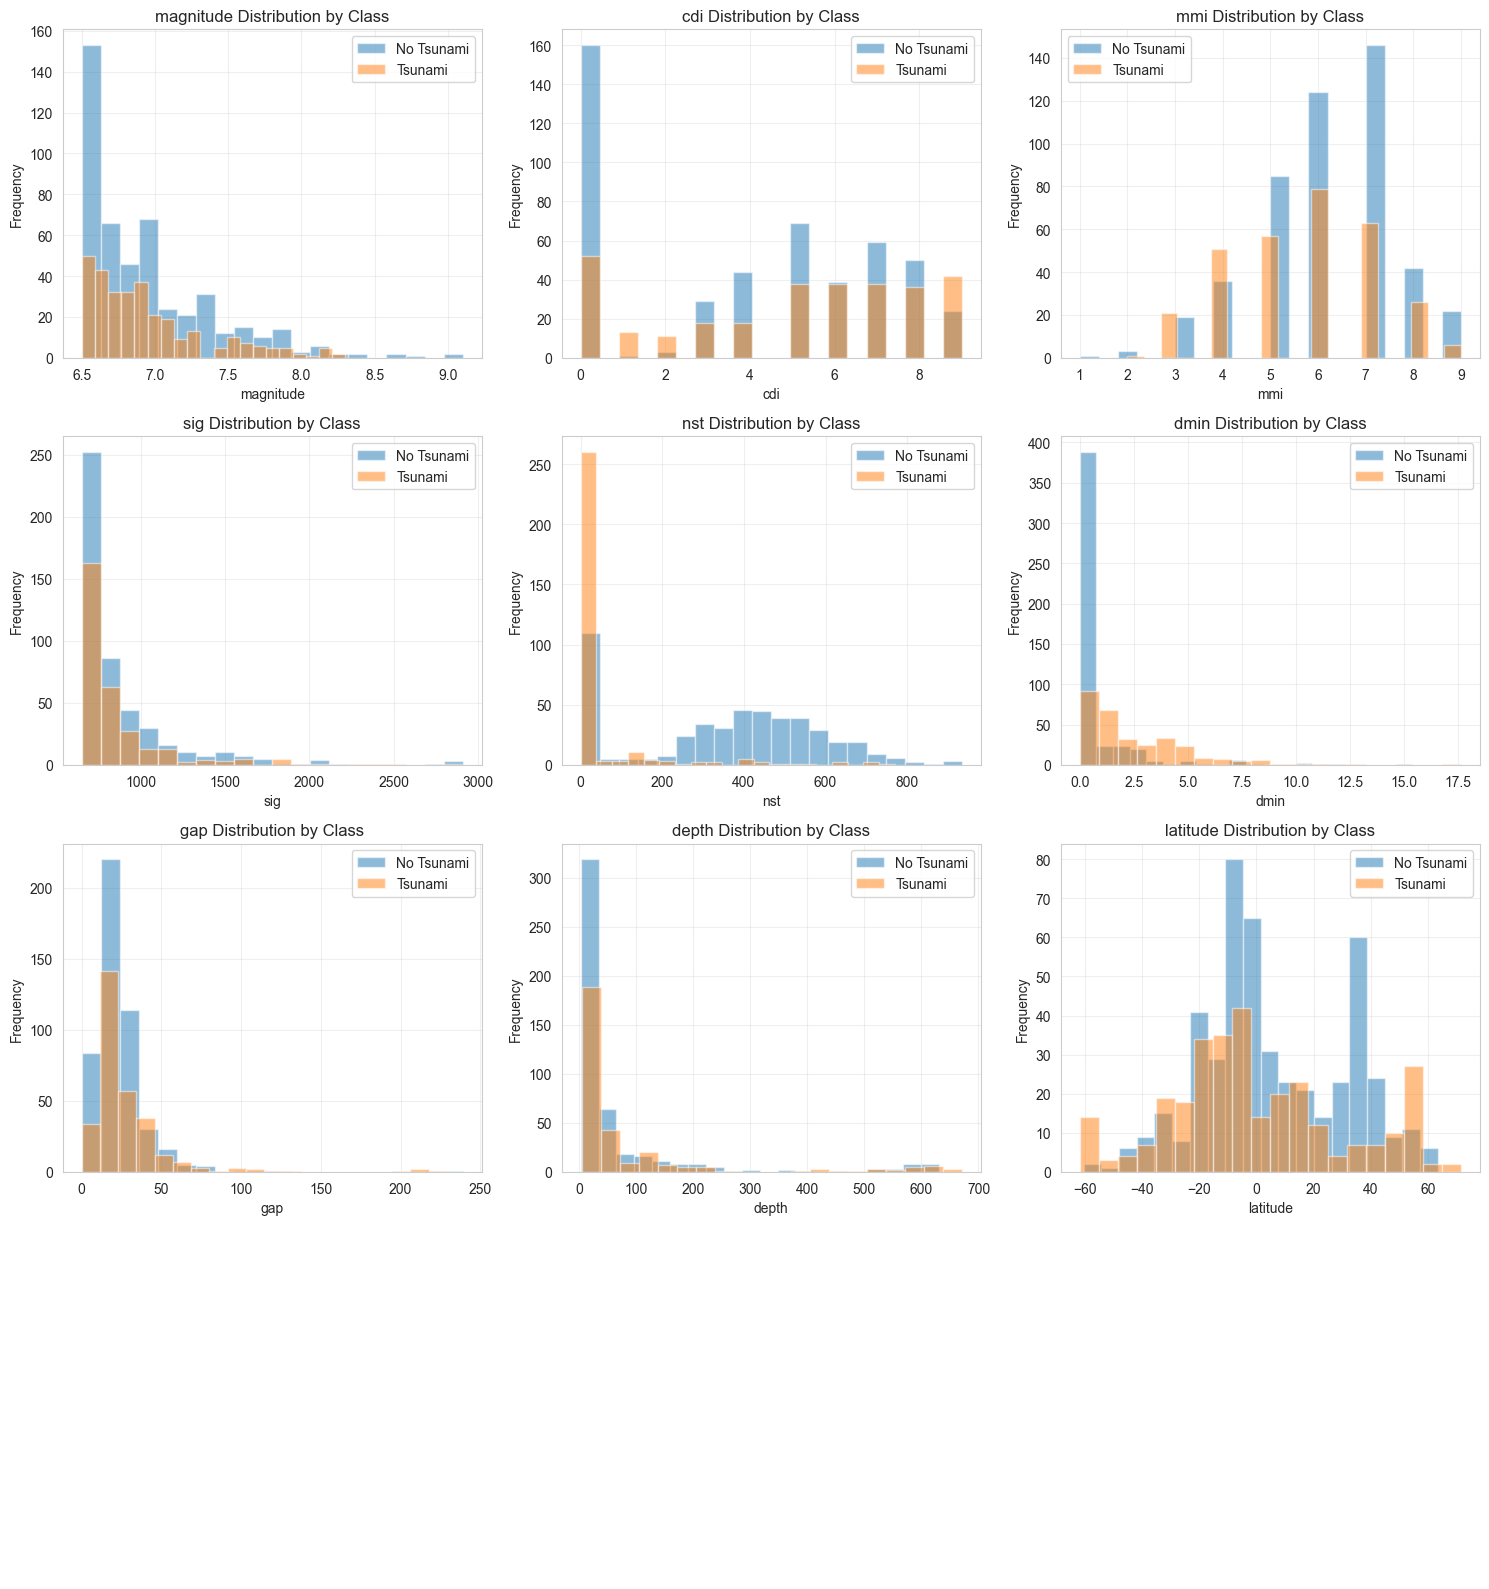

In [95]:
from scipy import stats

TARGET_COL = 'tsunami'
EXCLUDE_FEATS = {TARGET_COL, 'Year', 'Month', '_mag_bin'}
numeric_features = [col for col in df.select_dtypes(include=[np.number]).columns 
                    if col not in EXCLUDE_FEATS]

n_features = len(numeric_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, feature in enumerate(numeric_features[:9]):  # Top 9 features
    ax = axes[idx]
    
    df[df[TARGET_COL] == 0][feature].hist(alpha=0.5, label='No Tsunami', bins=20, ax=ax)
    df[df[TARGET_COL] == 1][feature].hist(alpha=0.5, label='Tsunami', bins=20, ax=ax)
    
    ax.set_title(f'{feature} Distribution by Class')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(alpha=0.3)

for idx in range(len(numeric_features[:9]), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### Boxplots by Class

Boxplots show the median, quartiles, and outliers for each feature, separated by class.

/var/folders/_d/ltkjwbkx4kv6hgm3pvws7ngr0000gn/T/ipykernel_47271/255710195.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['No Tsunami', 'Tsunami'], patch_artist=True)
/var/folders/_d/ltkjwbkx4kv6hgm3pvws7ngr0000gn/T/ipykernel_47271/255710195.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['No Tsunami', 'Tsunami'], patch_artist=True)
/var/folders/_d/ltkjwbkx4kv6hgm3pvws7ngr0000gn/T/ipykernel_47271/255710195.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['No Tsunami', 'Tsunami'], patch_artis

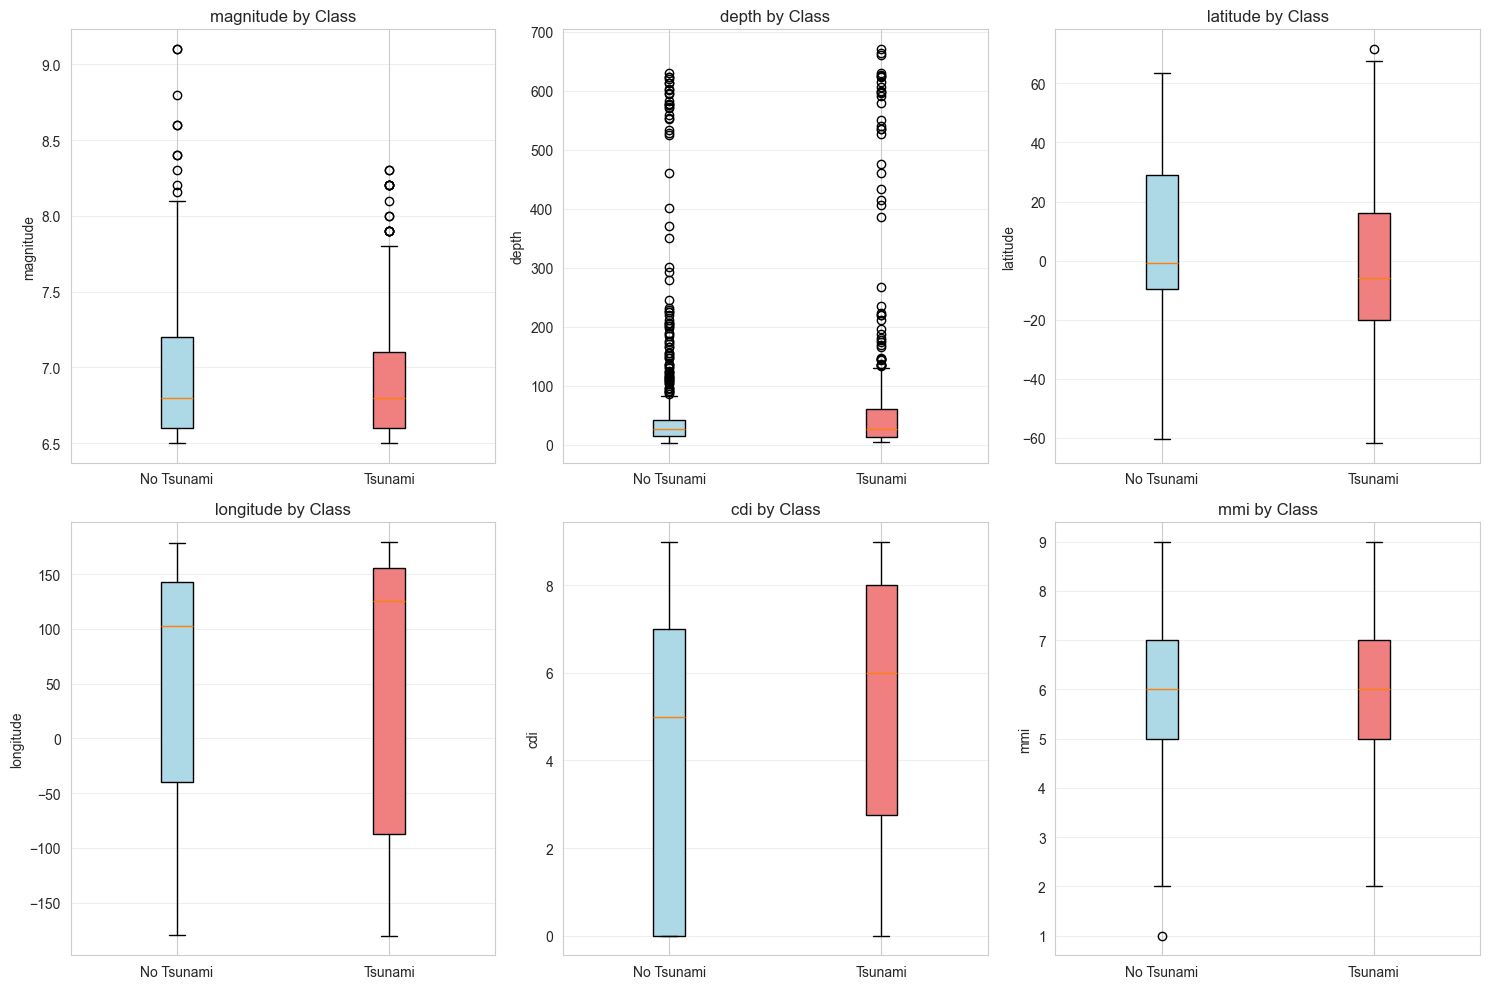

In [96]:
key_features = ['magnitude', 'depth', 'latitude', 'longitude', 'cdi', 'mmi']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    ax = axes[idx]
    
    data_to_plot = [df[df[TARGET_COL] == 0][feature].dropna(), 
                    df[df[TARGET_COL] == 1][feature].dropna()]
    
    bp = ax.boxplot(data_to_plot, labels=['No Tsunami', 'Tsunami'], patch_artist=True)
    
    colors = ['lightblue', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title(f'{feature} by Class')
    ax.set_ylabel(feature)
    ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Statistical Tests: Feature Differences by Class

Perform statistical tests (t-test, Mann-Whitney U) to identify features with significant differences between classes.

In [97]:
from scipy.stats import ttest_ind, mannwhitneyu

test_results = []

for feature in numeric_features:
    group_0 = df[df[TARGET_COL] == 0][feature].dropna()
    group_1 = df[df[TARGET_COL] == 1][feature].dropna()
    
    if len(group_0) > 0 and len(group_1) > 0:
        # T-test (assumes normal distribution)
        t_stat, t_pvalue = ttest_ind(group_0, group_1)
        
        # Mann-Whitney U test (non-parametric)
        u_stat, u_pvalue = mannwhitneyu(group_0, group_1, alternative='two-sided')
        
        test_results.append({
            'Feature': feature,
            'Mean (No Tsunami)': group_0.mean(),
            'Mean (Tsunami)': group_1.mean(),
            'Mean Difference': group_1.mean() - group_0.mean(),
            'T-test p-value': t_pvalue,
            'Mann-Whitney p-value': u_pvalue,
            'Significant (p<0.05)': 'Yes' if (t_pvalue < 0.05 or u_pvalue < 0.05) else 'No'
        })

test_df = pd.DataFrame(test_results)
test_df = test_df.sort_values('T-test p-value')
display(test_df)

,Feature,Mean (No Tsunami),Mean (Tsunami),Mean Difference,T-test p-value,Mann-Whitney p-value,Significant (p<0.05)
4,nst,349.933054,42.065789,-307.867265,1.030826e-77,2.738240e-65,Yes
5,dmin,0.617095,2.440036,1.822941,1.575930e-31,3.591718e-66,Yes
1,cdi,3.928870,4.970395,1.041524,6.678568e-06,2.123948e-06,Yes
2,mmi,6.135983,5.694079,-0.441904,3.520232e-05,2.731830e-05,Yes
9,longitude,65.461177,32.401155,-33.060022,1.246404e-04,9.309019e-01,Yes
6,gap,22.792448,28.571382,5.778934,1.114899e-03,1.722425e-02,Yes
10,abs_lat,20.282844,24.198509,3.915665,1.441743e-03,2.758418e-03,Yes
8,latitude,6.001553,-0.335356,-6.336909,1.519414e-03,4.151280e-04,Yes
7,depth,69.667356,85.656796,15.989440,1.123974e-01,4.337875e-01,No
11,mag_depth_ratio,0.308977,0.297787,-0.011191,5.092280e-01,3.858766e-01,No


## 1.3 Bivariate Analysis

We explore relationships between pairs of features and correlations with the target variable.

### Correlation Matrix

Compute and visualize the correlation matrix between all numeric features.

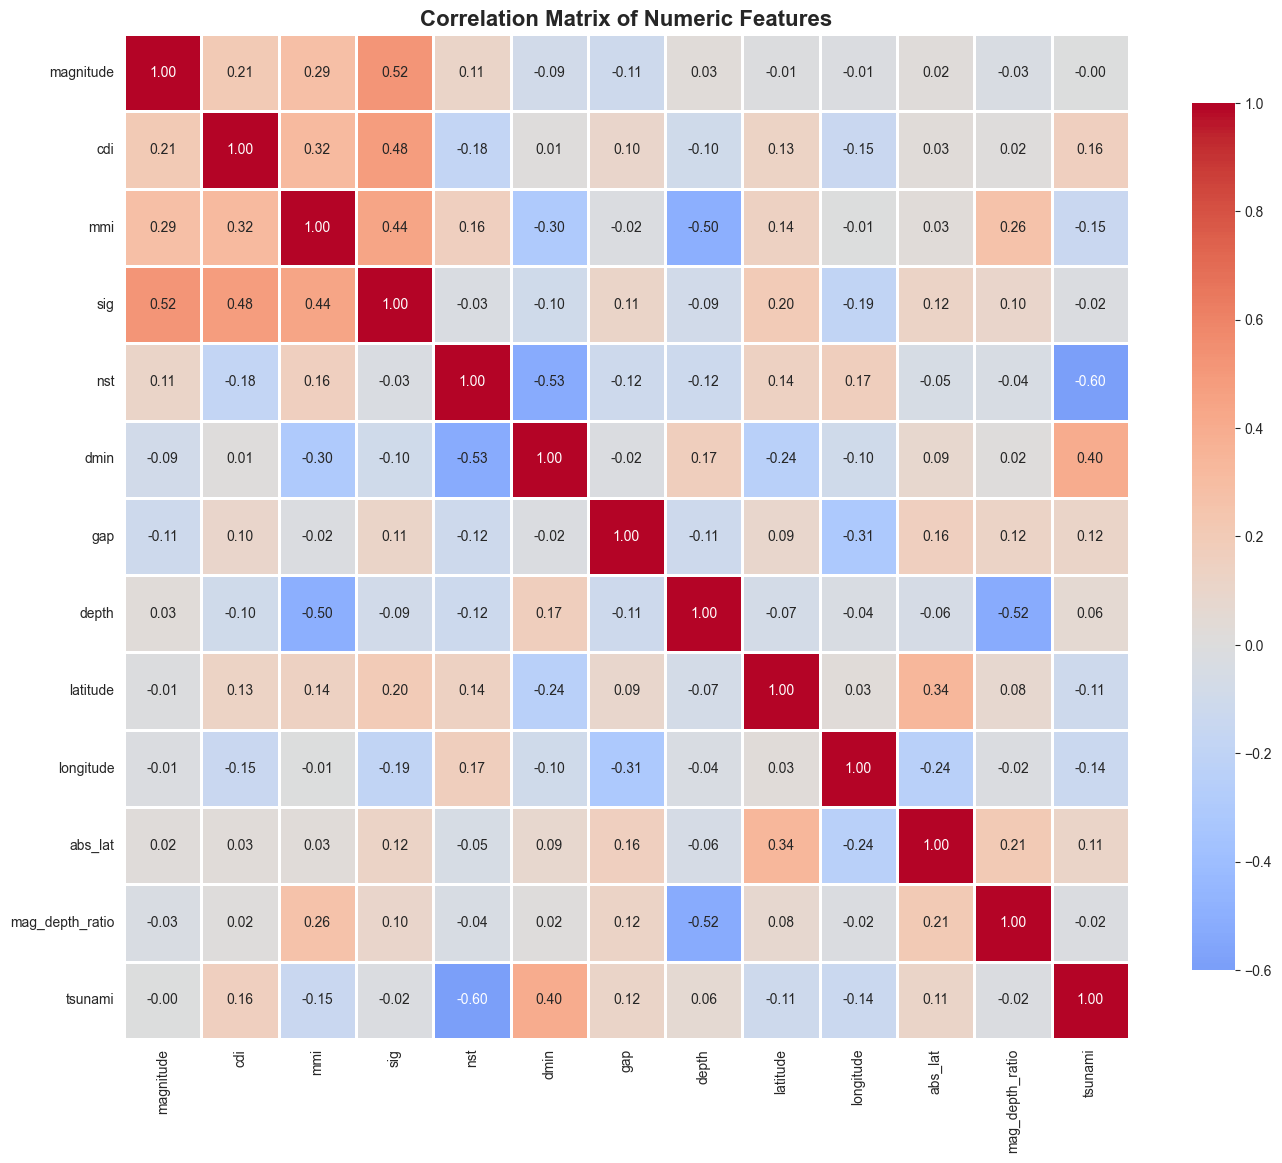

In [98]:
import seaborn as sns

corr_features = numeric_features + [TARGET_COL]
corr_matrix = df[corr_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Correlation with Target Variable

Identify features most correlated with the target variable (tsunami).

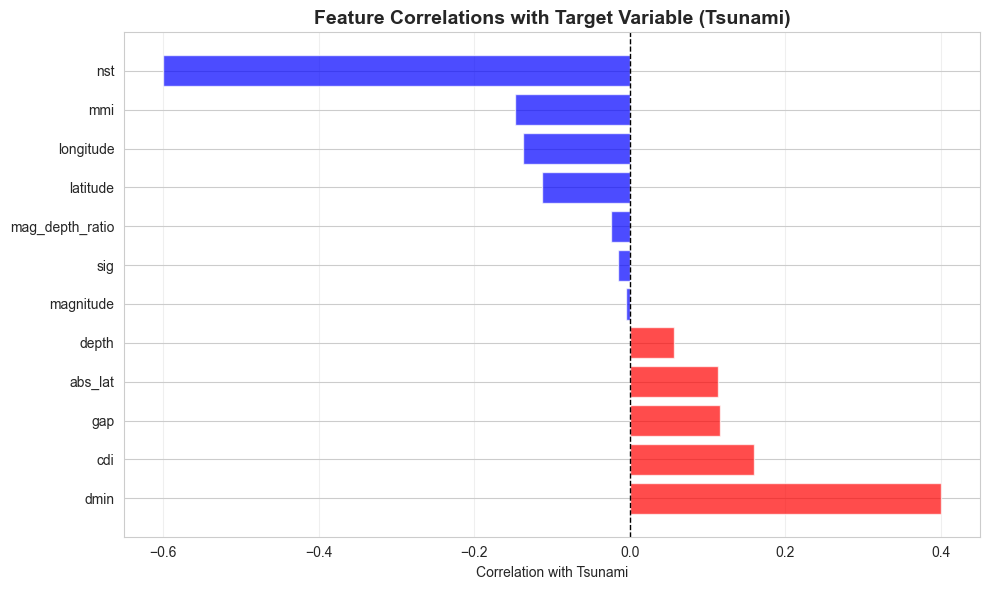


Top features correlated with tsunami:


nst                0.600231
dmin               0.400752
cdi                0.160266
mmi                0.147363
longitude          0.136778
gap                0.116360
abs_lat            0.113749
latitude           0.113209
depth              0.056814
mag_depth_ratio    0.023638
Name: tsunami, dtype: float64

In [99]:
# Correlation with target
target_corr = df[numeric_features + [TARGET_COL]].corr()[TARGET_COL].sort_values(ascending=False)
target_corr = target_corr[target_corr.index != TARGET_COL]

# Plot correlations
plt.figure(figsize=(10, 6))
colors = ['red' if x > 0 else 'blue' for x in target_corr.values]
plt.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
plt.yticks(range(len(target_corr)), target_corr.index)
plt.xlabel('Correlation with Tsunami')
plt.title('Feature Correlations with Target Variable (Tsunami)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nTop features correlated with tsunami:")
display(target_corr.abs().sort_values(ascending=False).head(10))

### Scatter Plots: Key Feature Pairs

Visualize relationships between important feature pairs, colored by target class.

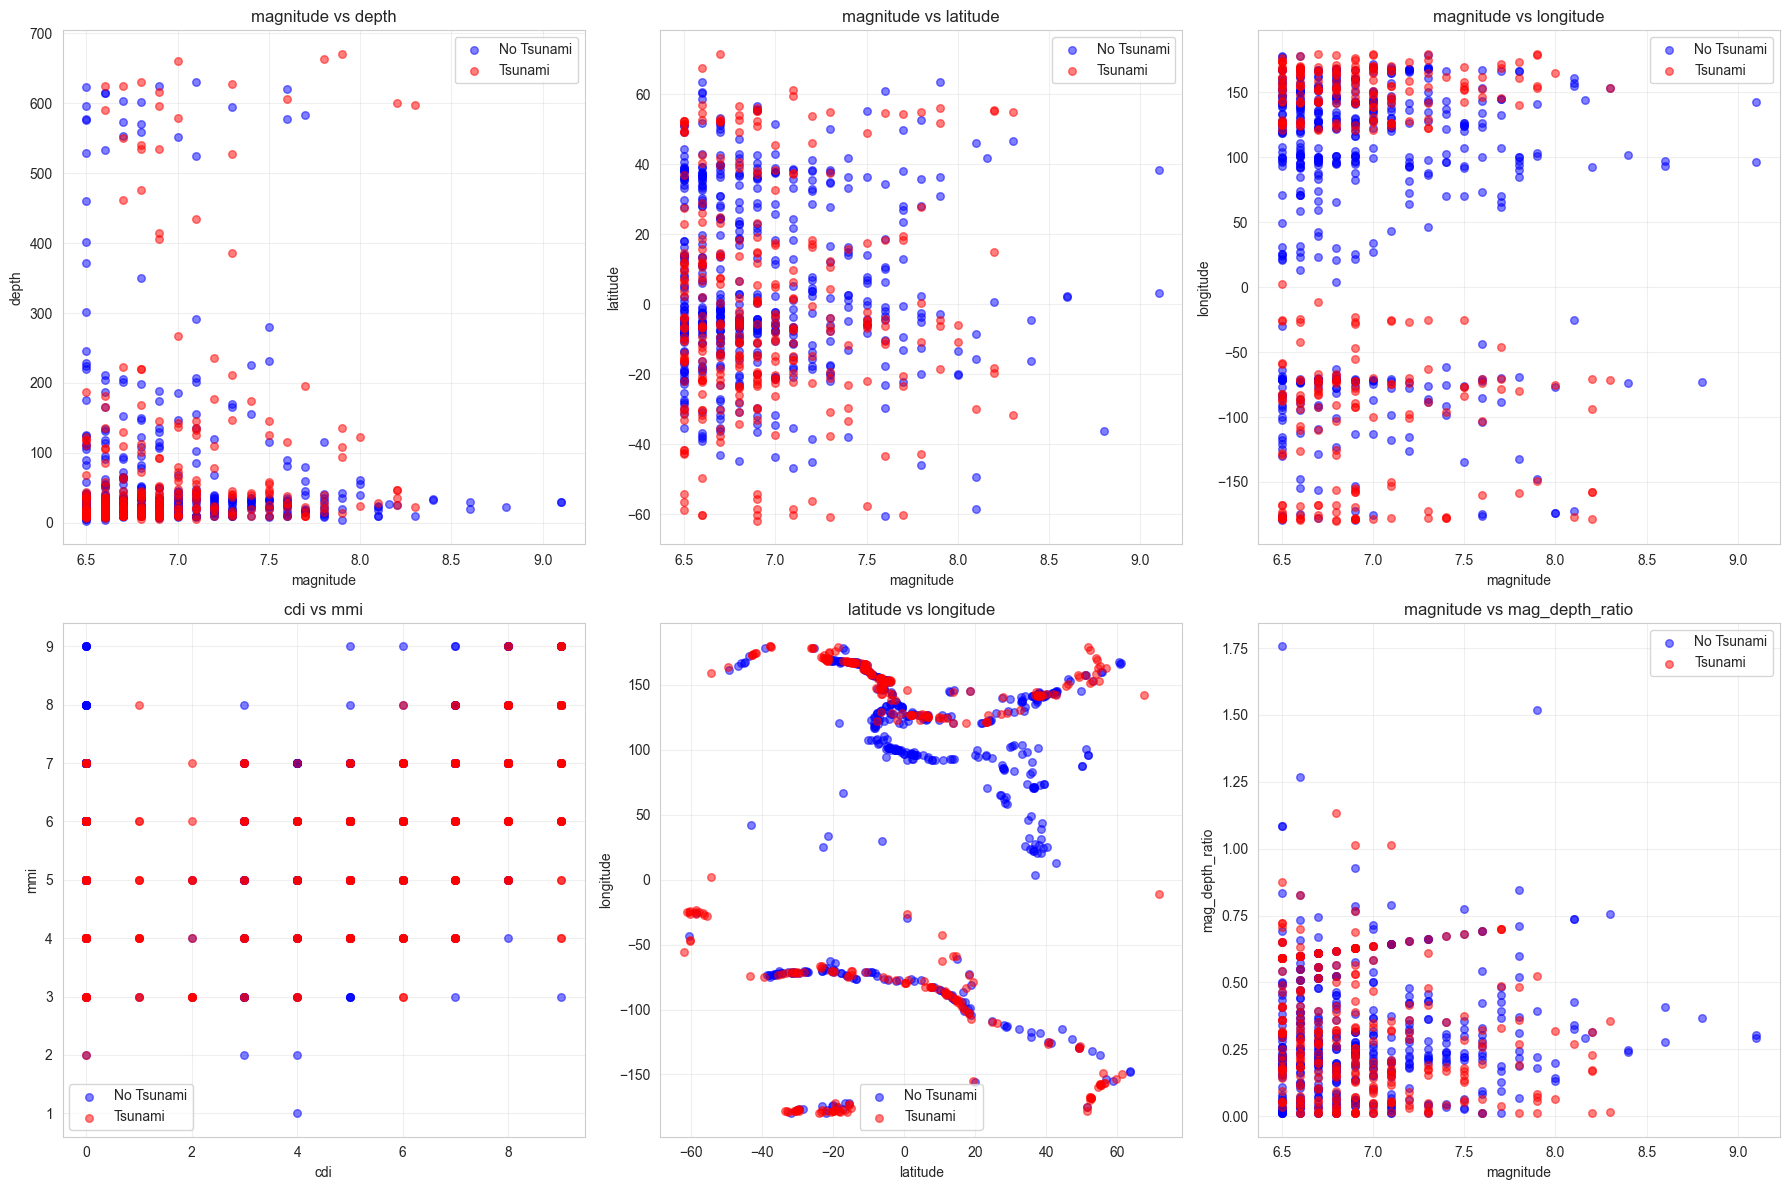

In [100]:
feature_pairs = [
    ('magnitude', 'depth'),
    ('magnitude', 'latitude'),
    ('magnitude', 'longitude'),
    ('cdi', 'mmi'),
    ('latitude', 'longitude'),
    ('magnitude', 'mag_depth_ratio')
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, (feat1, feat2) in enumerate(feature_pairs):
    ax = axes[idx]
    
    # Plot each class separately
    df_no_tsunami = df[df[TARGET_COL] == 0]
    df_tsunami = df[df[TARGET_COL] == 1]
    
    ax.scatter(df_no_tsunami[feat1], df_no_tsunami[feat2], 
              alpha=0.5, label='No Tsunami', s=30, color='blue')
    ax.scatter(df_tsunami[feat1], df_tsunami[feat2], 
              alpha=0.5, label='Tsunami', s=30, color='red')
    
    ax.set_xlabel(feat1)
    ax.set_ylabel(feat2)
    ax.set_title(f'{feat1} vs {feat2}')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 1.4 Multivariate Analysis

Advanced analysis using dimensionality reduction and clustering techniques to understand complex relationships in the data.

### Principal Component Analysis (PCA)

Apply PCA to reduce dimensionality and visualize the data in 2D/3D space.

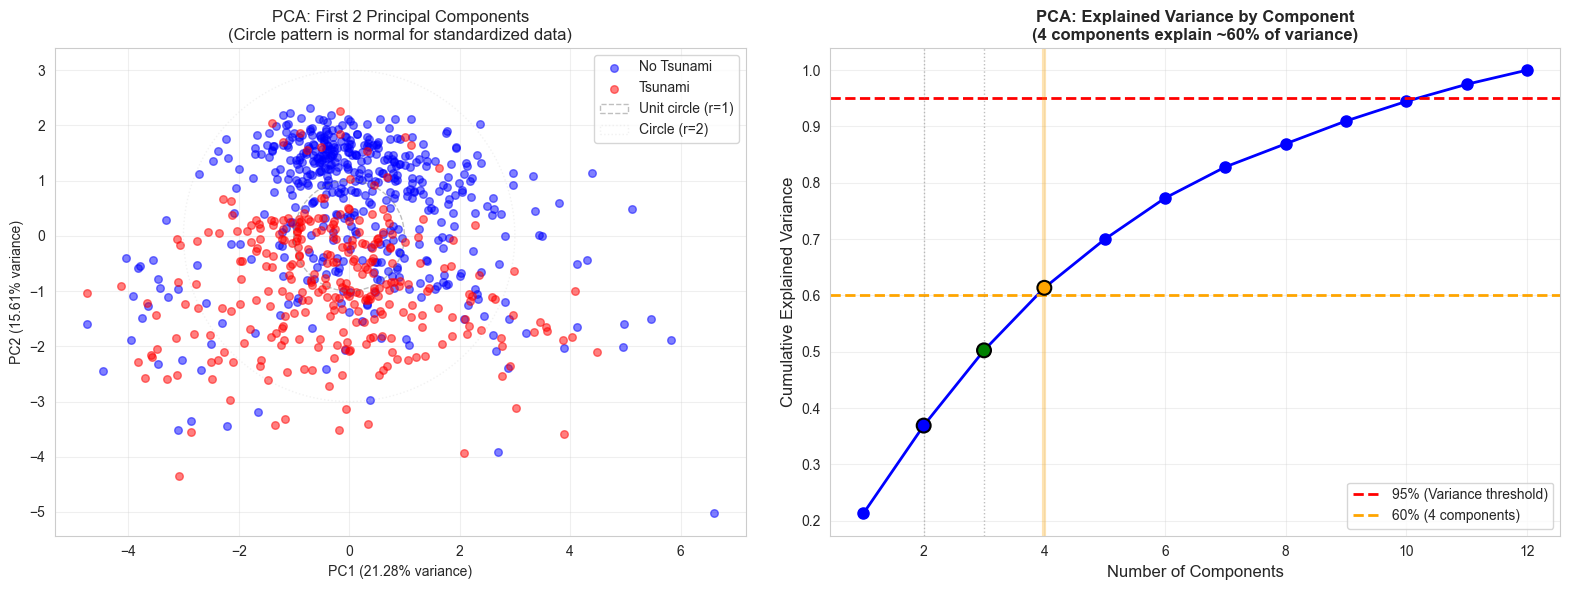


Variance explained:
  • 2 components: 36.89% of total variance
  • 3 components: 50.25% of total variance
  • 4 components: 61.35% of total variance (much better!)
  • Components needed for 95% variance: 11

Note: 4 components explain ~60% of variance, which is much better than 2D's 37%.
      See the next cell for 3D and 4D visualizations.


In [101]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data for PCA
X_pca = df[numeric_features].fillna(df[numeric_features].median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Apply PCA
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

# Visualize PCA results
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: PCA 2D colored by target
ax1 = axes[0]
# Use boolean masks for proper indexing alignment
no_tsunami_mask = df[TARGET_COL] == 0
tsunami_mask = df[TARGET_COL] == 1

ax1.scatter(X_pca_2d[no_tsunami_mask, 0], X_pca_2d[no_tsunami_mask, 1], 
           alpha=0.5, label='No Tsunami', s=30, color='blue')
ax1.scatter(X_pca_2d[tsunami_mask, 0], X_pca_2d[tsunami_mask, 1], 
           alpha=0.5, label='Tsunami', s=30, color='red')

# Add reference circles to visualize the pattern we're seeing
# The circle pattern is normal for standardized data in PCA space
circle1 = plt.Circle((0, 0), 1, fill=False, color='gray', linestyle='--', 
                     linewidth=1, alpha=0.5, label='Unit circle (r=1)')
circle2 = plt.Circle((0, 0), 3, fill=False, color='lightgray', linestyle=':', 
                     linewidth=1, alpha=0.3, label='Circle (r=2)')
ax1.add_patch(circle1)
ax1.add_patch(circle2)

ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
ax1.set_title('PCA: First 2 Principal Components\n(Circle pattern is normal for standardized data)')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.set_aspect('equal', adjustable='box')  # Equal aspect ratio to see true circular shape

# Plot 2: Explained variance
ax2 = axes[1]
pca_full = PCA()
pca_full.fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
explained_variance = pca_full.explained_variance_ratio_
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-', linewidth=2, markersize=8)
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% (Variance threshold)', linewidth=2)
ax2.axhline(y=0.60, color='orange', linestyle='--', label='60% (4 components)', linewidth=2)
# Highlight 2, 3, and 4 components
ax2.axvline(x=2, color='gray', linestyle=':', alpha=0.5, linewidth=1)
ax2.axvline(x=3, color='gray', linestyle=':', alpha=0.5, linewidth=1)
ax2.axvline(x=4, color='orange', linestyle='-', alpha=0.3, linewidth=3)
ax2.scatter([2, 3, 4], [cumulative_variance[1], cumulative_variance[2], cumulative_variance[3]], 
           s=100, c=['blue', 'green', 'orange'], zorder=5, edgecolors='black', linewidth=1.5)
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('PCA: Explained Variance by Component\n(4 components explain ~60% of variance)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nVariance explained:")
print(f"  • 2 components: {cumulative_variance[1]:.2%} of total variance")
print(f"  • 3 components: {cumulative_variance[2]:.2%} of total variance")
print(f"  • 4 components: {cumulative_variance[3]:.2%} of total variance (much better!)")
print(f"  • Components needed for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")
print(f"\nNote: 4 components explain ~60% of variance, which is much better than 2D's 37%.")
print(f"      See the next cell for 3D and 4D visualizations.")

3D PCA explains 50.25% of total variance
4D PCA explains 61.35% of total variance
Improvement over 2D: 24.46% additional variance


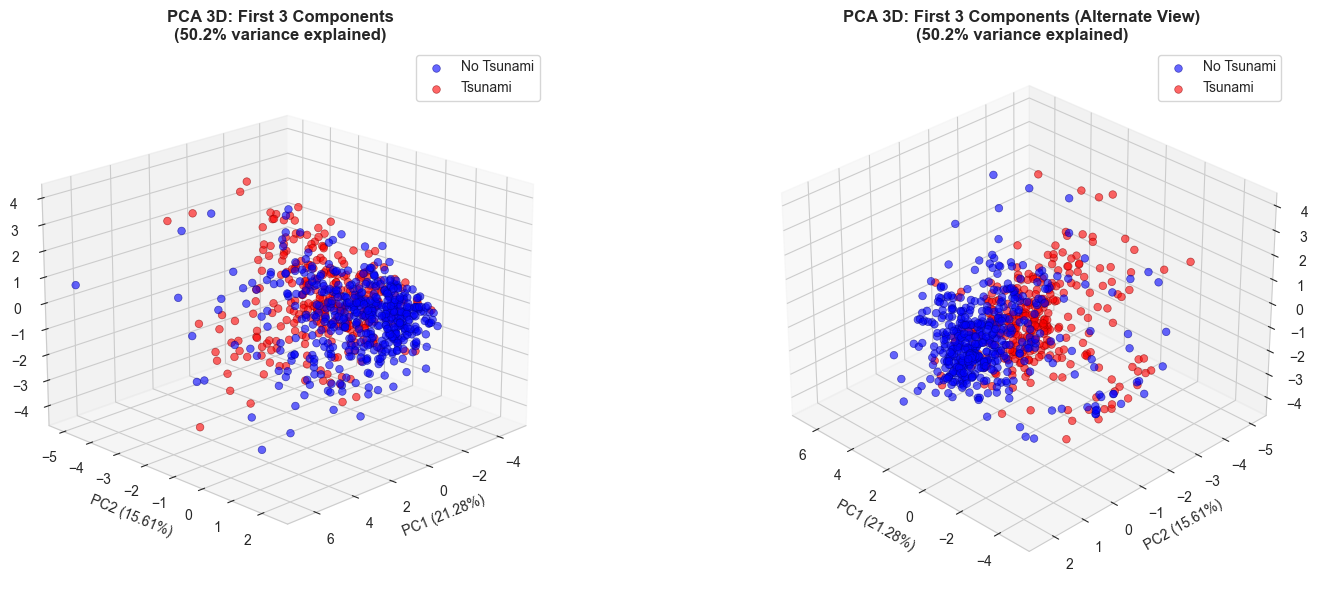

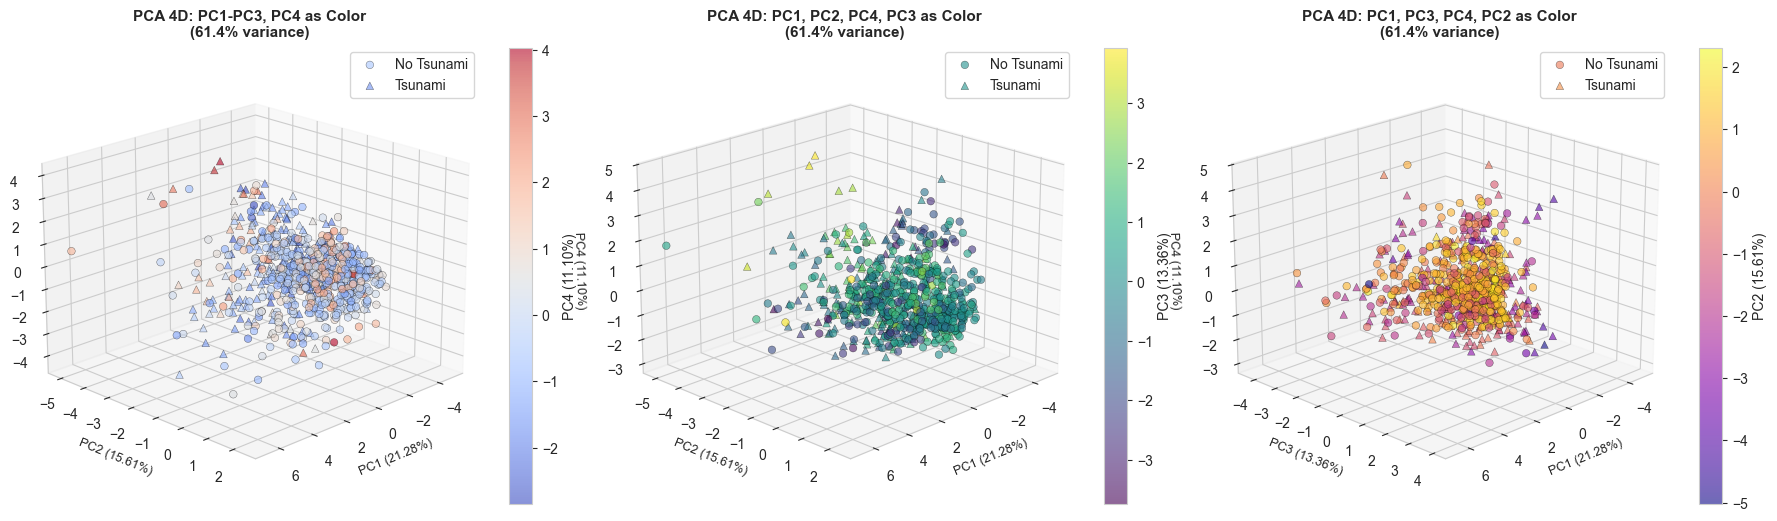


PCA DIMENSIONALITY REDUCTION SUMMARY

Original features: 12

Variance explained by different numbers of components:
  • 2 components: 36.89% (PC1: 21.28%, PC2: 15.61%)
  • 3 components: 50.25% (+ PC3: 13.36%)
  • 4 components: 61.35% (+ PC4: 11.10%)
  • Components needed for 95% variance: 11

ANALYSIS:
4 components explain ~60% of variance - much better than 2D (37%)
This reduces dimensionality from 11 features to 4 while preserving most information
The 3D and 4D visualizations show better separation between classes
Using 4 components is a good compromise between dimensionality and information retention


In [ ]:
# Extended PCA Visualizations: 3D and 4D
# Since 4 components explain ~60% of variance (much better than 2D's 37%),
# we create 3D and 4D visualizations to better understand the data structure

from mpl_toolkits.mplot3d import Axes3D

# Apply PCA for 3D and 4D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

pca_4d = PCA(n_components=4)
X_pca_4d = pca_4d.fit_transform(X_scaled)

# Get variance explained
variance_3d = np.sum(pca_3d.explained_variance_ratio_)
variance_4d = np.sum(pca_4d.explained_variance_ratio_)

print(f"3D PCA explains {variance_3d:.2%} of total variance")
print(f"4D PCA explains {variance_4d:.2%} of total variance")
print(f"Improvement over 2D: {variance_4d - cumulative_variance[1]:.2%} additional variance")

# ============================================================================
# VISUALIZATION: PCA 3D
# ============================================================================
fig = plt.figure(figsize=(16, 6))

# 3D Plot 1: View 1
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_pca_3d[no_tsunami_mask, 0], X_pca_3d[no_tsunami_mask, 1], 
                      X_pca_3d[no_tsunami_mask, 2], 
                      alpha=0.6, label='No Tsunami', s=30, color='blue', edgecolors='darkblue', linewidth=0.5)
scatter2 = ax1.scatter(X_pca_3d[tsunami_mask, 0], X_pca_3d[tsunami_mask, 1], 
                      X_pca_3d[tsunami_mask, 2], 
                      alpha=0.6, label='Tsunami', s=30, color='red', edgecolors='darkred', linewidth=0.5)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=10)
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=10)
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=10)
ax1.set_title(f'PCA 3D: First 3 Components\n({variance_3d:.1%} variance explained)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.view_init(elev=20, azim=45)

# 3D Plot 2: View 2 (different angle)
ax2 = fig.add_subplot(122, projection='3d')
scatter3 = ax2.scatter(X_pca_3d[no_tsunami_mask, 0], X_pca_3d[no_tsunami_mask, 1], 
                      X_pca_3d[no_tsunami_mask, 2], 
                      alpha=0.6, label='No Tsunami', s=30, color='blue', edgecolors='darkblue', linewidth=0.5)
scatter4 = ax2.scatter(X_pca_3d[tsunami_mask, 0], X_pca_3d[tsunami_mask, 1], 
                      X_pca_3d[tsunami_mask, 2], 
                      alpha=0.6, label='Tsunami', s=30, color='red', edgecolors='darkred', linewidth=0.5)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=10)
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=10)
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=10)
ax2.set_title(f'PCA 3D: First 3 Components (Alternate View)\n({variance_3d:.1%} variance explained)', fontsize=12, fontweight='bold')
ax2.legend()
ax2.view_init(elev=30, azim=135)

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZATION: PCA 4D (using color for 4th dimension)
# ============================================================================
fig = plt.figure(figsize=(18, 6))

# 4D Plot 1: PC1, PC2, PC3 with PC4 as color
ax1 = fig.add_subplot(131, projection='3d')
scatter1 = ax1.scatter(X_pca_4d[no_tsunami_mask, 0], X_pca_4d[no_tsunami_mask, 1], 
                      X_pca_4d[no_tsunami_mask, 2], 
                      c=X_pca_4d[no_tsunami_mask, 3], cmap='coolwarm', 
                      alpha=0.6, s=30, edgecolors='black', linewidth=0.3, label='No Tsunami')
scatter2 = ax1.scatter(X_pca_4d[tsunami_mask, 0], X_pca_4d[tsunami_mask, 1], 
                      X_pca_4d[tsunami_mask, 2], 
                      c=X_pca_4d[tsunami_mask, 3], cmap='coolwarm', 
                      alpha=0.6, s=30, edgecolors='black', linewidth=0.3, label='Tsunami', marker='^')
ax1.set_xlabel(f'PC1 ({pca_4d.explained_variance_ratio_[0]:.2%})', fontsize=9)
ax1.set_ylabel(f'PC2 ({pca_4d.explained_variance_ratio_[1]:.2%})', fontsize=9)
ax1.set_zlabel(f'PC3 ({pca_4d.explained_variance_ratio_[2]:.2%})', fontsize=9)
ax1.set_title(f'PCA 4D: PC1-PC3, PC4 as Color\n({variance_4d:.1%} variance)', fontsize=11, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label=f'PC4 ({pca_4d.explained_variance_ratio_[3]:.2%})', shrink=0.8)
ax1.legend()
ax1.view_init(elev=20, azim=45)

# 4D Plot 2: PC1, PC2, PC4 with PC3 as color
ax2 = fig.add_subplot(132, projection='3d')
scatter3 = ax2.scatter(X_pca_4d[no_tsunami_mask, 0], X_pca_4d[no_tsunami_mask, 1], 
                      X_pca_4d[no_tsunami_mask, 3], 
                      c=X_pca_4d[no_tsunami_mask, 2], cmap='viridis', 
                      alpha=0.6, s=30, edgecolors='black', linewidth=0.3, label='No Tsunami')
scatter4 = ax2.scatter(X_pca_4d[tsunami_mask, 0], X_pca_4d[tsunami_mask, 1], 
                      X_pca_4d[tsunami_mask, 3], 
                      c=X_pca_4d[tsunami_mask, 2], cmap='viridis', 
                      alpha=0.6, s=30, edgecolors='black', linewidth=0.3, label='Tsunami', marker='^')
ax2.set_xlabel(f'PC1 ({pca_4d.explained_variance_ratio_[0]:.2%})', fontsize=9)
ax2.set_ylabel(f'PC2 ({pca_4d.explained_variance_ratio_[1]:.2%})', fontsize=9)
ax2.set_zlabel(f'PC4 ({pca_4d.explained_variance_ratio_[3]:.2%})', fontsize=9)
ax2.set_title(f'PCA 4D: PC1, PC2, PC4, PC3 as Color\n({variance_4d:.1%} variance)', fontsize=11, fontweight='bold')
plt.colorbar(scatter3, ax=ax2, label=f'PC3 ({pca_4d.explained_variance_ratio_[2]:.2%})', shrink=0.8)
ax2.legend()
ax2.view_init(elev=20, azim=45)

# 4D Plot 3: PC1, PC3, PC4 with PC2 as color
ax3 = fig.add_subplot(133, projection='3d')
scatter5 = ax3.scatter(X_pca_4d[no_tsunami_mask, 0], X_pca_4d[no_tsunami_mask, 2], 
                      X_pca_4d[no_tsunami_mask, 3], 
                      c=X_pca_4d[no_tsunami_mask, 1], cmap='plasma', 
                      alpha=0.6, s=30, edgecolors='black', linewidth=0.3, label='No Tsunami')
scatter6 = ax3.scatter(X_pca_4d[tsunami_mask, 0], X_pca_4d[tsunami_mask, 2], 
                      X_pca_4d[tsunami_mask, 3], 
                      c=X_pca_4d[tsunami_mask, 1], cmap='plasma', 
                      alpha=0.6, s=30, edgecolors='black', linewidth=0.3, label='Tsunami', marker='^')
ax3.set_xlabel(f'PC1 ({pca_4d.explained_variance_ratio_[0]:.2%})', fontsize=9)
ax3.set_ylabel(f'PC3 ({pca_4d.explained_variance_ratio_[2]:.2%})', fontsize=9)
ax3.set_zlabel(f'PC4 ({pca_4d.explained_variance_ratio_[3]:.2%})', fontsize=9)
ax3.set_title(f'PCA 4D: PC1, PC3, PC4, PC2 as Color\n({variance_4d:.1%} variance)', fontsize=11, fontweight='bold')
plt.colorbar(scatter5, ax=ax3, label=f'PC2 ({pca_4d.explained_variance_ratio_[1]:.2%})', shrink=0.8)
ax3.legend()
ax3.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY
# ============================================================================
print(f"\n{'='*100}")
print("PCA DIMENSIONALITY REDUCTION SUMMARY")
print(f"{'='*100}")
print(f"\nOriginal features: {len(numeric_features)}")
print(f"\nVariance explained by different numbers of components:")
print(f"  • 2 components: {cumulative_variance[1]:.2%} (PC1: {explained_variance[0]:.2%}, PC2: {explained_variance[1]:.2%})")
print(f"  • 3 components: {cumulative_variance[2]:.2%} (+ PC3: {explained_variance[2]:.2%})")
print(f"  • 4 components: {cumulative_variance[3]:.2%} (+ PC4: {explained_variance[3]:.2%})")
print(f"  • Components needed for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")
print(f"\n{'='*100}")
print("ANALYSIS:")
print(f"{'='*100}")
print("We found that 4 components explain ~60% of variance - much better than 2D (37%)")
print("This reduces dimensionality from 11 features to 4 while preserving most information")
print("The 3D and 4D visualizations show better separation between classes")
print("Using 4 components is a good compromise between dimensionality and information retention")
print(f"{'='*100}")

### K-Means Clustering

Apply K-means clustering to identify natural groups in the data.

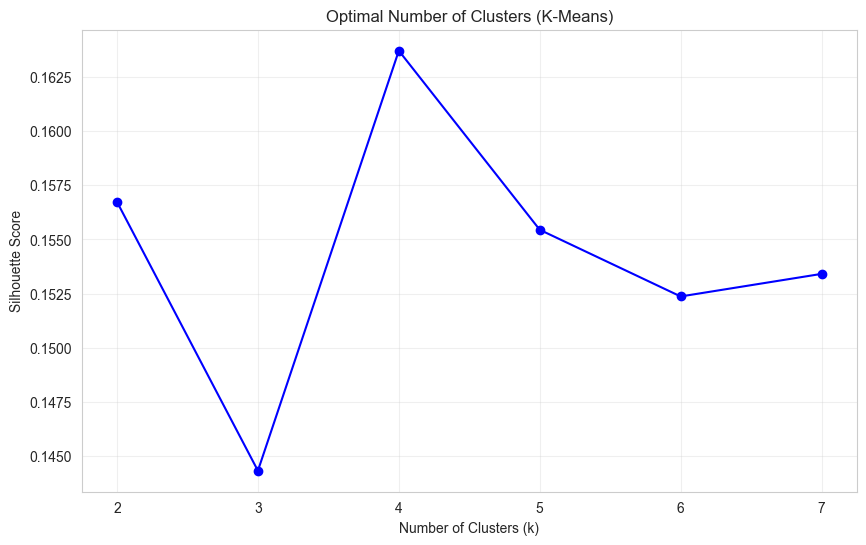

Optimal number of clusters: 4 (silhouette score: 0.164)


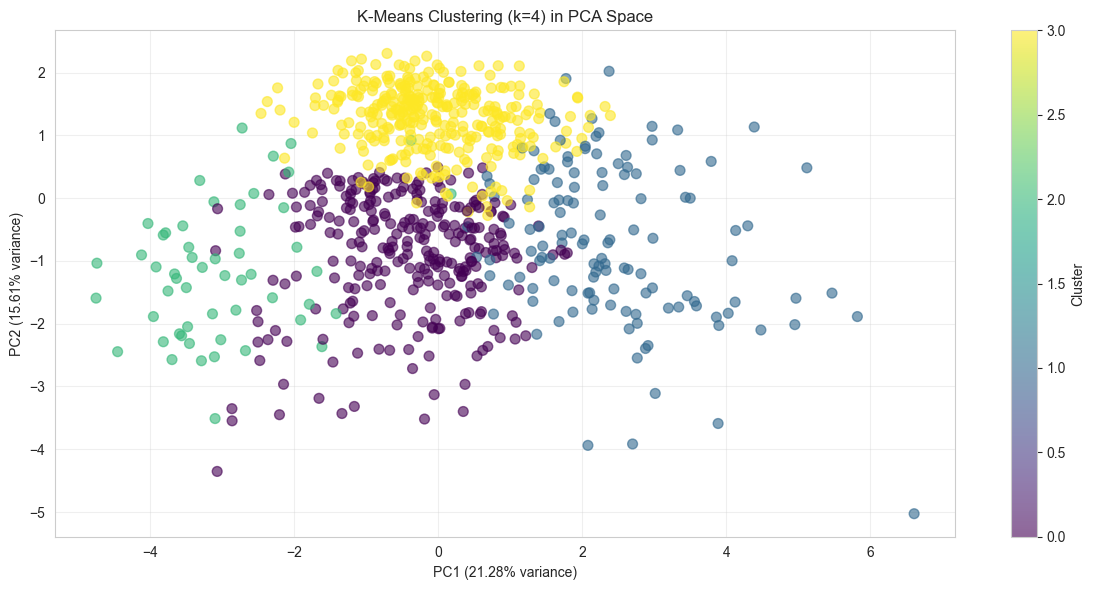


Cluster composition by target class (%):


tsunami,0,1
cluster,,
0,27.816901,72.183099
1,57.480315,42.519685
2,50.000000,50.000000
3,94.321767,5.678233


In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine optimal number of clusters using silhouette score
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Optimal Number of Clusters (K-Means)')
plt.grid(alpha=0.3)
plt.show()

# Use optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k} (silhouette score: {max(silhouette_scores):.3f})")

# Apply K-means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters in PCA space
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=df['cluster'], 
                     cmap='viridis', alpha=0.6, s=50)
plt.colorbar(scatter, label='Cluster')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title(f'K-Means Clustering (k={optimal_k}) in PCA Space')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Analyze cluster composition by target
cluster_target = pd.crosstab(df['cluster'], df[TARGET_COL], normalize='index') * 100
print("\nCluster composition by target class (%):")
display(cluster_target)

### Statistical Summary by Class

Finally, provide a comprehensive quantitative comparison of all features between the two classes.

In [104]:
# Statistical summary by class
TARGET = "tsunami"
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [col for col in num_cols if col not in [TARGET, "Year", "Month", "cluster"]]

group_stats = df.groupby(TARGET)[num_cols].agg(["mean","std","median","min","max"])
display(group_stats)

magnitude                                  cdi                       \
             mean       std median  min  max      mean       std median min   
tsunami                                                                       
0        6.942803  0.459541    6.8  6.5  9.1  3.928870  3.160149    5.0   0   
1        6.938487  0.423250    6.8  6.5  8.3  4.970395  3.084473    6.0   0   

             ...    abs_lat                                        \
        max  ...       mean        std    median     min      max   
tsunami      ...                                                    
0         9  ...  20.282844  15.680918  17.05105  0.0930  63.5144   
1         9  ...  24.198509  18.172076  18.55880  0.3819  71.6312   

        mag_depth_ratio                                          
                   mean       std    median       min       max  
tsunami                                                          
0              0.308977  0.232501  0.253846  0.010421  1.756757  
1              0.297787  0.228643  0.257162  0.010552  1.133333  

[2 rows x 60 columns]

# Part 2: Machine Learning Pipeline Setup

We set up the machine learning infrastructure for tsunami prediction. We prepared the data, create custom transformers for feature engineering, build preprocessing pipelines, and define the classification models we used. We the setup and configuration of the ML pipeline components.


In [105]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)

import joblib
from pathlib import Path

import mlflow
import mlflow.sklearn
from mlflow import log_metric, log_param, log_params, log_artifacts

## Data Preparation

Prepare the dataset for machine learning by defining features and target variable.

In [ ]:
TARGET = "tsunami"

EXCLUDE_FEATS = {TARGET, "Year", "Month"}

FEATURE_COLS = [col for col in df.columns if col not in EXCLUDE_FEATS]

if 'country' in FEATURE_COLS:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df['country_encoded'] = le.fit_transform(df['country'].astype(str))
    FEATURE_COLS = [col if col != 'country' else 'country_encoded' for col in FEATURE_COLS]
    print(f"Encoded 'country' column ({len(le.classes_)} unique countries)")

X = df[FEATURE_COLS].copy()
y = df[TARGET].copy()

print(f"Dataset shape: {X.shape}")
print(f"Features ({len(FEATURE_COLS)}): {FEATURE_COLS}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nTarget balance: {y.mean():.2%} positive class")

Dataset shape: (782, 14)
Features (14): ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude', 'abs_lat', 'mag_depth_ratio', '_mag_bin', 'cluster']

Target distribution:
tsunami
0    478
1    304
Name: count, dtype: int64

Target balance: 38.87% positive class


## MLflow Setup

Initialize MLflow for experiment tracking and model versioning. This will track all hyperparameters, metrics, and models for easy comparison and reproducibility.


In [ ]:
current_dir = Path().resolve()
if current_dir.name == "Codes (.ipynb & .py)":
    project_root = current_dir.parent
elif (current_dir / "requirements.txt").exists():
    project_root = current_dir
elif (current_dir.parent / "requirements.txt").exists():
    project_root = current_dir.parent
else:
    project_root = Path("/Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo")

mlflow_dir = project_root / "mlruns"
mlflow.set_tracking_uri(f"file://{mlflow_dir}")

EXPERIMENT_NAME = "tsunami_prediction"
try:
    experiment_id = mlflow.create_experiment(EXPERIMENT_NAME)
    print(f"Created new MLflow experiment: {EXPERIMENT_NAME}")
except Exception:
    experiment_id = mlflow.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
    print(f"Using existing MLflow experiment: {EXPERIMENT_NAME}")

mlflow.set_experiment(EXPERIMENT_NAME)

print(f"MLflow tracking URI: {mlflow.get_tracking_uri()}")
print(f"Experiment ID: {experiment_id}")
print(f"MLflow runs will be saved to: {mlflow_dir}")

Using existing MLflow experiment: tsunami_prediction
MLflow tracking URI: file:///Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/mlruns
Experiment ID: 421161102095694732
MLflow runs will be saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/mlruns


## Custom Transformers

Create reusable transformers for feature engineering that can be integrated into the pipeline.

In [108]:
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    """
    Custom transformer for feature engineering.
    Creates derived features from existing ones.
    Works with pandas DataFrames and preserves column names.
    """
    def __init__(self):
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        """Fit the transformer and store feature names."""
        X = pd.DataFrame(X) if not isinstance(X, pd.DataFrame) else X
        X_transformed = self._transform(X)
        self.feature_names_ = list(X_transformed.columns)
        return self
    
    def _transform(self, X):
        """Internal transform method."""
        X = X.copy() if isinstance(X, pd.DataFrame) else pd.DataFrame(X)
        
        if 'latitude' in X.columns:
            X['abs_lat'] = X['latitude'].abs()
        
        if 'magnitude' in X.columns and 'depth' in X.columns:
            X['mag_depth_ratio'] = X['magnitude'] / (X['depth'] + 1.0)
        
        if 'latitude' in X.columns and 'longitude' in X.columns:
            X['distance_from_origin'] = np.sqrt(X['latitude']**2 + X['longitude']**2)
        
        if 'magnitude' in X.columns:
            X['magnitude_squared'] = X['magnitude'] ** 2
        
        return X
    
    def transform(self, X):
        """Apply feature engineering transformations."""
        return self._transform(X)

fe_transformer = FeatureEngineeringTransformer()
X_test_transformed = fe_transformer.fit_transform(X)
print(f"Original features: {len(FEATURE_COLS)}")
print(f"Features after engineering: {X_test_transformed.shape[1]}")
new_features = set(X_test_transformed.columns) - set(FEATURE_COLS)
print(f"New features ({len(new_features)}): {new_features}")

Original features: 14
Features after engineering: 16
New features (2): {'distance_from_origin', 'magnitude_squared'}


## Preprocessing Pipeline

Create a preprocessing pipeline that handles feature engineering and scaling.

In [109]:
preprocessing_pipeline = Pipeline([
    ('feature_engineering', FeatureEngineeringTransformer()),
    ('scaler', RobustScaler())
])

print("Preprocessing pipeline created!")
print("\nPipeline steps:")
for i, (name, step) in enumerate(preprocessing_pipeline.steps, 1):
    print(f"  {i}. {name}: {type(step).__name__}")

Preprocessing pipeline created!

Pipeline steps:
  1. feature_engineering: FeatureEngineeringTransformer
  2. scaler: RobustScaler


# Part 3: Data Splitting and Model Configuration

We preparedd the data for machine learning by splitting it into training and testing sets, and configures the models we used. We define multiple classification algorithms and create complete pipelines that combine preprocessing with each model. This preparation phase is essential before training and ensures we have properly separated data and configured models ready for the training phase.


## Train-Test Split

Split the data into training and testing sets. We'll use temporal splitting to respect the time order.

In [110]:
split_year = 2018
train_mask = df['Year'] < split_year
test_mask = df['Year'] >= split_year

train_df_temp = df[train_mask].copy()
train_df_sorted = train_df_temp.sort_values(['Year', 'Month']).reset_index(drop=True)
sorted_indices = train_df_sorted.index

X_train = X[train_mask].iloc[sorted_indices].reset_index(drop=True)
y_train = y[train_mask].iloc[sorted_indices].reset_index(drop=True)
X_test = X[test_mask].copy()
y_test = y[test_mask].copy()

print(f"Temporal split (split year: {split_year}):")
print(f"  Training set: {X_train.shape[0]} samples ({train_mask.sum() / len(df):.1%})")
print(f"  Test set: {X_test.shape[0]} samples ({test_mask.sum() / len(df):.1%})")
print(f"\nTraining target distribution:")
print(y_train.value_counts())
print(f"\nTest target distribution:")
print(y_test.value_counts())
print(f"\nTraining data sorted by Year and Month for TimeSeriesSplit cross-validation")

Temporal split (split year: 2018):
  Training set: 597 samples (76.3%)
  Test set: 185 samples (23.7%)

Training target distribution:
tsunami
0    432
1    165
Name: count, dtype: int64

Test target distribution:
tsunami
1    139
0     46
Name: count, dtype: int64

Training data sorted by Year and Month for TimeSeriesSplit cross-validation


## Model Definitions

Define multiple classification models to compare performance.

In [111]:
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        random_state=42,
        class_weight='balanced'
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42
    ),
    'SVM': SVC(
        kernel='rbf',
        probability=True,
        random_state=42,
        class_weight='balanced'
    ),
    'K-Nearest Neighbors': KNeighborsClassifier(
        n_neighbors=5,
        weights='distance'
    )
}

print(f"Defined {len(models)} models:")
for name in models.keys():
    print(f"  - {name}")

Defined 5 models:
  - Logistic Regression
  - Random Forest
  - Gradient Boosting
  - SVM
  - K-Nearest Neighbors


## Complete Pipeline (Preprocessing + Model)

Create complete pipelines that combine preprocessing and model for each algorithm.

In [112]:
pipelines = {}

for model_name, model in models.items():
    pipelines[model_name] = Pipeline([
        ('preprocessing', preprocessing_pipeline),
        ('classifier', model)
    ])

print("Complete pipelines created:")
for name, pipeline in pipelines.items():
    print(f"\n{name}:")
    for i, (step_name, step) in enumerate(pipeline.steps, 1):
        print(f"  {i}. {step_name}: {type(step).__name__}")

Complete pipelines created:

Logistic Regression:
  1. preprocessing: Pipeline
  2. classifier: LogisticRegression

Random Forest:
  1. preprocessing: Pipeline
  2. classifier: RandomForestClassifier

Gradient Boosting:
  1. preprocessing: Pipeline
  2. classifier: GradientBoostingClassifier

SVM:
  1. preprocessing: Pipeline
  2. classifier: SVC

K-Nearest Neighbors:
  1. preprocessing: Pipeline
  2. classifier: KNeighborsClassifier


# Part 4: Model Training

We training all the configured models on the training dataset. We fitted each pipeline to the training data and make initial predictions on the test set to obtain baseline performance metrics. This step was crucial to to compare different algorithms and identify which models show the most promise for our tsunami prediction task.


## Model Training

Train all models and evaluate their performance.

In [113]:
results = {}
trained_pipelines = {}

print("Training models...")
print("=" * 100)

for model_name, pipeline in pipelines.items():
    print(f"\nTraining {model_name}...")
    
    with mlflow.start_run(run_name=f"{model_name}_baseline"):
        classifier = pipeline.named_steps['classifier']
        hyperparams = {}
        
        if hasattr(classifier, 'get_params'):
            model_params = classifier.get_params()
            for key, value in model_params.items():
                if key not in ['random_state', 'n_jobs', 'verbose']:
                    hyperparams[f"classifier__{key}"] = str(value)
        
        mlflow.log_params(hyperparams)
        mlflow.log_param("model_name", model_name)
        mlflow.log_param("split_year", split_year)
        mlflow.log_param("train_size", len(X_train))
        mlflow.log_param("test_size", len(X_test))
        
        pipeline.fit(X_train, y_train)
        trained_pipelines[model_name] = pipeline
        
        y_pred = pipeline.predict(X_test)
        y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        
        results[model_name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'roc_auc': roc_auc,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
        
        mlflow.log_metric("test_accuracy", accuracy)
        mlflow.log_metric("test_precision", precision)
        mlflow.log_metric("test_recall", recall)
        mlflow.log_metric("test_f1", f1)
        mlflow.log_metric("test_roc_auc", roc_auc)
        
        mlflow.sklearn.log_model(pipeline, "model")
        
        run_id = mlflow.active_run().info.run_id
        print(f"Training complete | MLflow Run ID: {run_id}")

print("\n" + "=" * 100)
print("All models trained successfully!")
print(f"\nView MLflow UI: mlflow ui --backend-store-uri {mlflow_dir}")

2025/11/13 10:00:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training models...

Training Logistic Regression...


2025/11/13 10:00:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/13 10:00:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training complete | MLflow Run ID: 5fcec6352b74454bab244de9dcc71afd

Training Random Forest...


2025/11/13 10:00:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/13 10:00:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training complete | MLflow Run ID: 8ead997e1e5f4d17999b3f113e97e960

Training Gradient Boosting...


2025/11/13 10:00:42 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/13 10:00:42 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training complete | MLflow Run ID: a5f943bc82eb40b6b4c027a064c012f0

Training SVM...


2025/11/13 10:00:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/13 10:00:43 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Training complete | MLflow Run ID: b2f3057651cb445e827357f7636206ac

Training K-Nearest Neighbors...


2025/11/13 10:00:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Training complete | MLflow Run ID: d6a4af6afaf849acbfc2fda1ae1a74d1

All models trained successfully!

View MLflow UI: mlflow ui --backend-store-uri /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/mlruns


# Part 5: Model Evaluation

We comprehensive evaluation of all trained models using multiple metrics and visualization techniques. We compare model performance, identify the best model, optimize its hyperparameters, and perform detailed analysis including confusion matrices, ROC curves, and feature importance. This thorough evaluation helped us understand model behavior and select the optimal model for deployment.


## Model Evaluation

Compare model performance using comprehensive metrics.

In [114]:
results_df = pd.DataFrame({
    model_name: {
        'Accuracy': metrics['accuracy'],
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1'],
        'ROC-AUC': metrics['roc_auc']
    }
    for model_name, metrics in results.items()
}).T

results_df = results_df.sort_values('F1-Score', ascending=False)

print("Model Performance Comparison:")
print("=" * 100)
display(results_df.round(4))

Model Performance Comparison:


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Random Forest,0.8216,0.8955,0.8633,0.8791,0.8635
Logistic Regression,0.7730,0.7803,0.9712,0.8654,0.6631
Gradient Boosting,0.8000,0.9048,0.8201,0.8604,0.8499
SVM,0.7568,0.7733,0.9568,0.8553,0.5982
K-Nearest Neighbors,0.6162,0.8091,0.6403,0.7149,0.6386


In [115]:
best_model = results_df.index[0]
print(f"Best model (by F1-Score): {best_model}")
print(f"F1-Score: {results_df.loc[best_model, 'F1-Score']:.4f}")
print(f"ROC-AUC: {results_df.loc[best_model, 'ROC-AUC']:.4f}")

Best model (by F1-Score): Random Forest
F1-Score: 0.8791
ROC-AUC: 0.8635


## Hyperparameter Optimization

Optimize hyperparameters for the best model using Grid Search, Random Search, or Optuna.
This step improves model performance by finding the optimal hyperparameter combination.

In [116]:
OPTIMIZATION_METHOD = 'grid'
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

best_model_type = best_model
base_model = models[best_model_type]

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'lbfgs']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [5, 10, 15, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
        'classifier__subsample': [0.8, 1.0]
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
        'classifier__kernel': ['rbf', 'poly', 'sigmoid']
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    }
}

if best_model_type in param_grids:
    param_grid = param_grids[best_model_type]
    
    print(f"Optimizing hyperparameters for {best_model_type}...")
    print(f"Method: {OPTIMIZATION_METHOD}")
    print(f"Parameter grid: {list(param_grid.keys())}")
    
    tscv = TimeSeriesSplit(n_splits=5)
    print(f"Using TimeSeriesSplit with {tscv.n_splits} splits (respects temporal order)")
    
    if OPTIMIZATION_METHOD == 'grid':
        grid_search = GridSearchCV(
            trained_pipelines[best_model_type],
            param_grid,
            cv=tscv,
            scoring='f1',
            n_jobs=-1,
            verbose=1
        )
        grid_search.fit(X_train, y_train)
        optimized_pipeline = grid_search.best_estimator_
        
        print(f"\nGrid Search complete!")
        print(f"Best F1-Score (CV): {grid_search.best_score_:.4f}")
        print(f"Best parameters:")
        for param, value in grid_search.best_params_.items():
            print(f"  {param}: {value}")
    
    elif OPTIMIZATION_METHOD == 'random':
        random_search = RandomizedSearchCV(
            trained_pipelines[best_model_type],
            param_grid,
            n_iter=50,
            cv=tscv,
            scoring='f1',
            n_jobs=-1,
            random_state=42,
            verbose=1
        )
        random_search.fit(X_train, y_train)
        optimized_pipeline = random_search.best_estimator_
        
        print(f"\nRandom Search complete!")
        print(f"Best F1-Score (CV): {random_search.best_score_:.4f}")
        print(f"Best parameters:")
        for param, value in random_search.best_params_.items():
            print(f"  {param}: {value}")
    
    elif OPTIMIZATION_METHOD == 'optuna':
        try:
            import optuna
            
            def objective(trial):
                if best_model_type == 'Random Forest':
                    params = {
                        'classifier__n_estimators': trial.suggest_int('classifier__n_estimators', 50, 300),
                        'classifier__max_depth': trial.suggest_int('classifier__max_depth', 5, 30),
                        'classifier__min_samples_split': trial.suggest_int('classifier__min_samples_split', 2, 20),
                        'classifier__min_samples_leaf': trial.suggest_int('classifier__min_samples_leaf', 1, 10)
                    }
                elif best_model_type == 'Gradient Boosting':
                    params = {
                        'classifier__n_estimators': trial.suggest_int('classifier__n_estimators', 50, 300),
                        'classifier__max_depth': trial.suggest_int('classifier__max_depth', 3, 10),
                        'classifier__learning_rate': trial.suggest_float('classifier__learning_rate', 0.01, 0.3, log=True),
                        'classifier__subsample': trial.suggest_float('classifier__subsample', 0.6, 1.0)
                    }
                elif best_model_type == 'Logistic Regression':
                    params = {
                        'classifier__C': trial.suggest_float('classifier__C', 0.01, 100, log=True),
                        'classifier__penalty': trial.suggest_categorical('classifier__penalty', ['l1', 'l2']),
                        'classifier__solver': trial.suggest_categorical('classifier__solver', ['liblinear', 'lbfgs'])
                    }
                else:
                    return None
                
                pipeline = Pipeline([
                    ('preprocessing', preprocessing_pipeline),
                    ('classifier', type(base_model)(**{k.replace('classifier__', ''): v for k, v in params.items()}))
                ])
                
                # Use TimeSeriesSplit for temporal cross-validation
                from sklearn.model_selection import cross_val_score
                tscv = TimeSeriesSplit(n_splits=5)
                scores = cross_val_score(pipeline, X_train, y_train, cv=tscv, scoring='f1', n_jobs=-1)
                return scores.mean()
            
            study = optuna.create_study(direction='maximize')
            study.optimize(objective, n_trials=50, show_progress_bar=True)
            
            best_params = {k.replace('classifier__', ''): v for k, v in study.best_params.items()}
            optimized_pipeline = Pipeline([
                ('preprocessing', preprocessing_pipeline),
                ('classifier', type(base_model)(**best_params))
            ])
            optimized_pipeline.fit(X_train, y_train)
            
            print(f"\nOptuna optimization complete!")
            print(f"Best F1-Score (CV): {study.best_value:.4f}")
            print(f"Best parameters:")
            for param, value in study.best_params.items():
                print(f"  {param}: {value}")
        
        except ImportError:
            print("Optuna not available. Falling back to Grid Search...")
            # Use TimeSeriesSplit for temporal cross-validation
            tscv = TimeSeriesSplit(n_splits=5)
            grid_search = GridSearchCV(
                trained_pipelines[best_model_type],
                param_grid,
                cv=tscv,
                scoring='f1',
                n_jobs=-1,
                verbose=1
            )
            grid_search.fit(X_train, y_train)
            optimized_pipeline = grid_search.best_estimator_
    
    y_pred_optimized = optimized_pipeline.predict(X_test)
    y_pred_proba_optimized = optimized_pipeline.predict_proba(X_test)[:, 1]
    
    optimized_results = {
        'accuracy': accuracy_score(y_test, y_pred_optimized),
        'precision': precision_score(y_test, y_pred_optimized),
        'recall': recall_score(y_test, y_pred_optimized),
        'f1': f1_score(y_test, y_pred_optimized),
        'roc_auc': roc_auc_score(y_test, y_pred_proba_optimized)
    }
    
    print(f"\n{'='*100}")
    print(f"Comparison: Before vs After Optimization")
    print(f"{'='*100}")
    print(f"F1-Score:  {results[best_model_type]['f1']:.4f} → {optimized_results['f1']:.4f} ({optimized_results['f1'] - results[best_model_type]['f1']:+.4f})")
    print(f"ROC-AUC:   {results[best_model_type]['roc_auc']:.4f} → {optimized_results['roc_auc']:.4f} ({optimized_results['roc_auc'] - results[best_model_type]['roc_auc']:+.4f})")
    print(f"Precision: {results[best_model_type]['precision']:.4f} → {optimized_results['precision']:.4f} ({optimized_results['precision'] - results[best_model_type]['precision']:+.4f})")
    print(f"Recall:    {results[best_model_type]['recall']:.4f} → {optimized_results['recall']:.4f} ({optimized_results['recall'] - results[best_model_type]['recall']:+.4f})")
    
    best_pipeline = optimized_pipeline
    
else:
    print(f"No parameter grid defined for {best_model_type}")
    print("Skipping hyperparameter optimization.")

Optimizing hyperparameters for Random Forest...
Method: grid
Parameter grid: ['classifier__n_estimators', 'classifier__max_depth', 'classifier__min_samples_split', 'classifier__min_samples_leaf']
Using TimeSeriesSplit with 5 splits (respects temporal order)
Fitting 5 folds for each of 135 candidates, totalling 675 fits

Grid Search complete!
Best F1-Score (CV): 0.2579
Best parameters:
  classifier__max_depth: 10
  classifier__min_samples_leaf: 4
  classifier__min_samples_split: 10
  classifier__n_estimators: 50

Comparison: Before vs After Optimization
F1-Score:  0.8791 → 0.8512 (-0.0279)
ROC-AUC:   0.8635 → 0.8151 (-0.0483)
Precision: 0.8955 → 0.8200 (-0.0755)
Recall:    0.8633 → 0.8849 (+0.0216)


## Detailed Evaluation: Best Model

Get detailed classification report and confusion matrix for the best model.

Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

  No Tsunami       0.63      0.70      0.66        46
     Tsunami       0.90      0.86      0.88       139

    accuracy                           0.82       185
   macro avg       0.76      0.78      0.77       185
weighted avg       0.83      0.82      0.82       185


Confusion Matrix:


,Predicted: No Tsunami,Predicted: Tsunami
Actual: No Tsunami,32,14
Actual: Tsunami,19,120


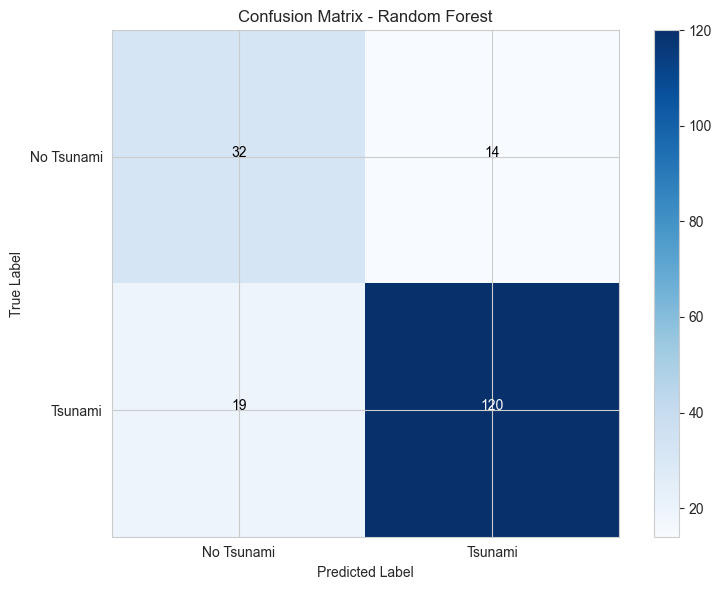

In [117]:
best_pipeline = trained_pipelines[best_model]
y_pred_best = results[best_model]['y_pred']

print(f"Detailed Classification Report for {best_model}:")
print("=" * 100)
print(classification_report(y_test, y_pred_best, target_names=['No Tsunami', 'Tsunami']))

print("\nConfusion Matrix:")
print("=" * 100)
cm = confusion_matrix(y_test, y_pred_best)
cm_df = pd.DataFrame(cm, 
                     index=['Actual: No Tsunami', 'Actual: Tsunami'],
                     columns=['Predicted: No Tsunami', 'Predicted: Tsunami'])
display(cm_df)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix - {best_model}')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Tsunami', 'Tsunami'])
plt.yticks(tick_marks, ['No Tsunami', 'Tsunami'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

## ROC and Precision-Recall Curves

Visualize model performance using ROC and Precision-Recall curves.

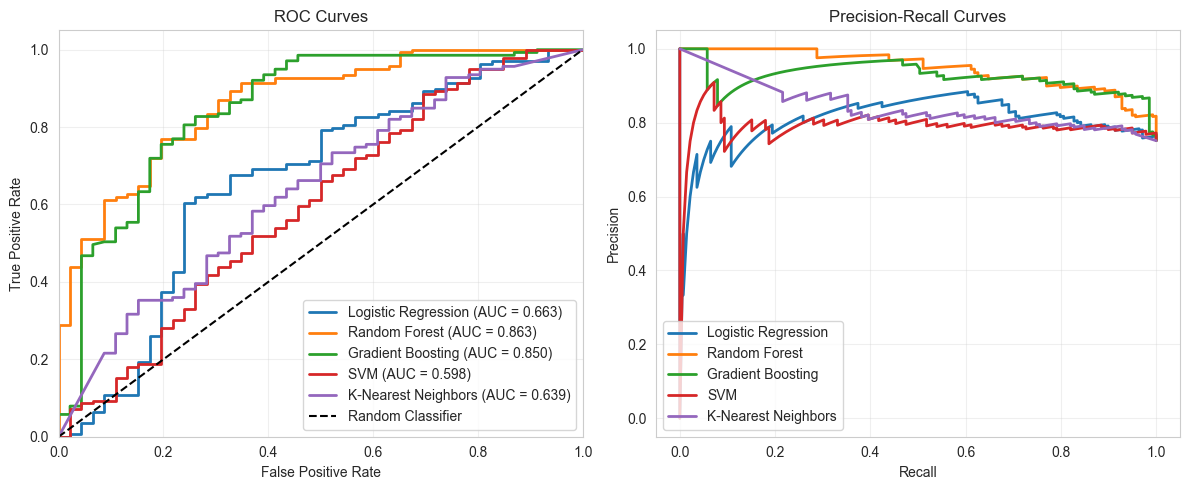

In [118]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for model_name, metrics in results.items():
    fpr, tpr, _ = roc_curve(y_test, metrics['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['roc_auc']:.3f})", linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
for model_name, metrics in results.items():
    precision, recall, _ = precision_recall_curve(y_test, metrics['y_pred_proba'])
    plt.plot(recall, precision, label=f"{model_name}", linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend(loc="lower left")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Feature Importance (for Tree-based Models)

Analyze feature importance for interpretable models.


Random Forest - Top 10 Most Important Features:


,feature,importance
5,dmin,0.233801
4,nst,0.184963
13,cluster,0.109085
9,longitude,0.086156
14,distance_from_origin,0.075161
8,latitude,0.060174
10,abs_lat,0.050898
6,gap,0.039810
11,mag_depth_ratio,0.034160
7,depth,0.033790


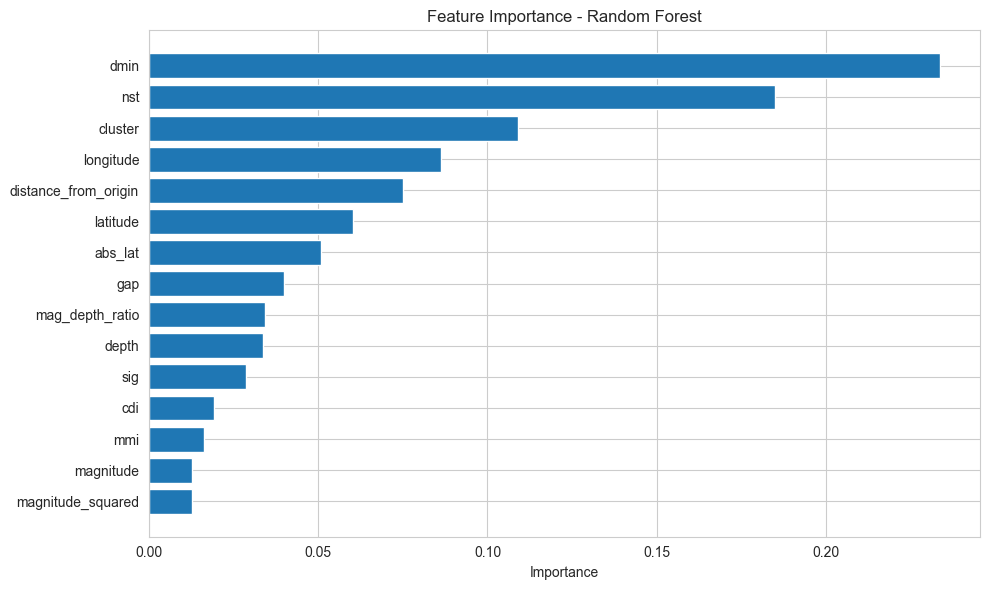


Gradient Boosting - Top 10 Most Important Features:


,feature,importance
5,dmin,0.457729
9,longitude,0.154064
14,distance_from_origin,0.121038
10,abs_lat,0.053785
4,nst,0.047158
11,mag_depth_ratio,0.045848
8,latitude,0.026453
3,sig,0.026083
6,gap,0.022712
7,depth,0.019564


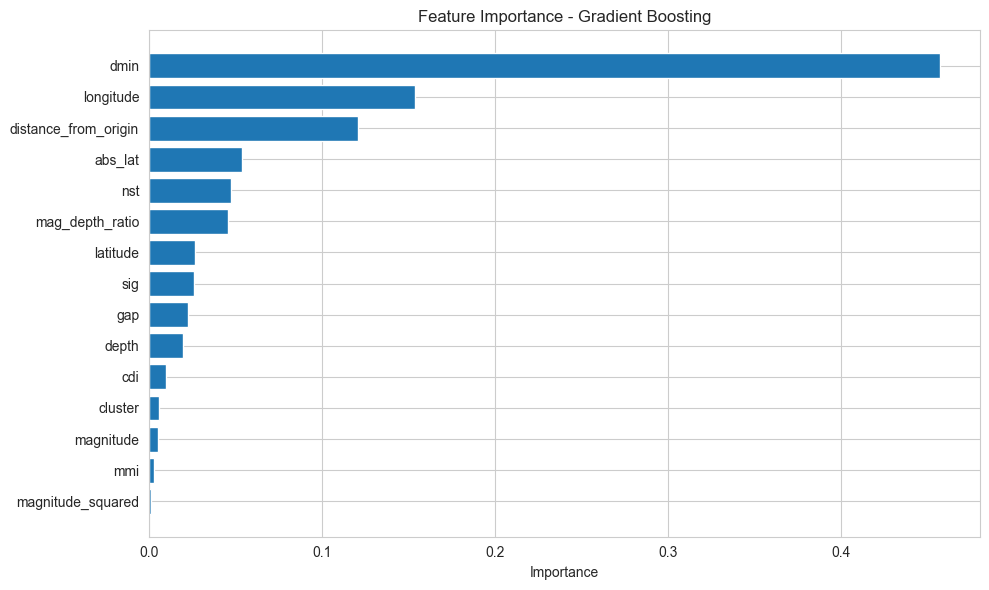

In [119]:
tree_models = ['Random Forest', 'Gradient Boosting']

for model_name in tree_models:
    if model_name in trained_pipelines:
        pipeline = trained_pipelines[model_name]
        classifier = pipeline.named_steps['classifier']
        
        feature_names = pipeline.named_steps['preprocessing'].named_steps['feature_engineering'].feature_names_
        
        if hasattr(classifier, 'feature_importances_'):
            importances = classifier.feature_importances_
            feature_importance_df = pd.DataFrame({
                'feature': feature_names,
                'importance': importances
            }).sort_values('importance', ascending=False)
            
            print(f"\n{model_name} - Top 10 Most Important Features:")
            print("=" * 100)
            display(feature_importance_df.head(10))
            
            plt.figure(figsize=(10, 6))
            top_features = feature_importance_df.head(15)
            plt.barh(range(len(top_features)), top_features['importance'].values)
            plt.yticks(range(len(top_features)), top_features['feature'].values)
            plt.xlabel('Importance')
            plt.title(f'Feature Importance - {model_name}')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()

# Part 6: Model Persistence and Deployment

We saving the trained models and pipeline for future use and deployment. We save the best model, all trained pipelines, evaluation results, and metadata to disk, so we could reuse the models without retraining. This was essential for production deployment and sharing models with others.


## Save Pipeline for Reuse

Save the best pipeline for future use and deployment.

In [120]:
current_dir = Path().resolve()
if current_dir.name == "notebooks":
    project_root = current_dir.parent
elif (current_dir / "requirements.txt").exists():
    project_root = current_dir
else:
    project_root = current_dir.parent

output_dir = project_root / "outputs"
output_dir.mkdir(exist_ok=True)

best_pipeline_path = output_dir / "best_pipeline.joblib"
joblib.dump(best_pipeline, best_pipeline_path)
print(f"Best pipeline saved to: {best_pipeline_path}")

all_pipelines_path = output_dir / "all_pipelines.joblib"
joblib.dump(trained_pipelines, all_pipelines_path)
print(f"All pipelines saved to: {all_pipelines_path}")

results_path = output_dir / "model_results.csv"
results_df.to_csv(results_path)
print(f"Results saved to: {results_path}")

metadata = {
    'best_model': best_model,
    'feature_columns': FEATURE_COLS,
    'target': TARGET,
    'train_size': len(X_train),
    'test_size': len(X_test),
    'split_year': split_year
}
metadata_path = output_dir / "pipeline_metadata.joblib"
joblib.dump(metadata, metadata_path)
print(f"Metadata saved to: {metadata_path}")

print("\n" + "=" * 100)
print("Pipeline saved successfully!")
print(f"\nLocal files:")
print(f"  -> pipeline = joblib.load('{best_pipeline_path}')")
print(f"  -> predictions = pipeline.predict(new_data)")
print(f"\nMLflow tracking:")
print(f"  -> All models and runs are tracked in: {mlflow_dir}")
print(f"  -> View UI: mlflow ui --backend-store-uri {mlflow_dir}")
print(f"  -> Load from MLflow: mlflow.sklearn.load_model('runs:/<run_id>/model')")
print("=" * 100)

Best pipeline saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/best_pipeline.joblib
All pipelines saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/all_pipelines.joblib
Results saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/model_results.csv
Metadata saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/pipeline_metadata.joblib

Pipeline saved successfully!

Local files:
  -> pipeline = joblib.load('/Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/best_pipeline.joblib')
  -> predictions = pipeline.predict(new_data)

MLflow tracking:
  -> All models and runs are tracked in: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/mlruns
  -> View UI: mlflow ui --backend-store-uri /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Pro

## Load and Use Saved Pipeline

Example of how to load and use the saved pipeline for new predictions.

In [121]:
print("To use the saved pipeline:")
print("1. Load: pipeline = joblib.load('outputs/best_pipeline.joblib')")
print("2. Predict: predictions = pipeline.predict(new_data)")
print("3. Probabilities: probabilities = pipeline.predict_proba(new_data)")

To use the saved pipeline:
1. Load: pipeline = joblib.load('outputs/best_pipeline.joblib')
2. Predict: predictions = pipeline.predict(new_data)
3. Probabilities: probabilities = pipeline.predict_proba(new_data)


# Part 7: Predictive Analysis for 2023

We demonstrated the practical application of our trained model by generating predictions for potential tsunami scenarios in 2023. We createdd realistic combinations of earthquake features based on historical patterns and use our best-performing model to identify the 10 most probable tsunami scenarios. This predictive analysis helps illustrate how the model can be used for risk assessment and early warning systems, providing actionable insights based on the patterns learned from historical data.


## Generate Scenarios for 2023

We created realistic earthquake scenarios for 2023 by sampling from the historical distribution of features. This approach made sure that our predictions are based on plausible combinations of earthquake characteristics that have been observed in the past. We generate multiple scenarios covering different magnitude ranges, depths, and geographic locations to comprehensively assess tsunami risk.


In [122]:
from itertools import product

magnitude_range = np.linspace(df['magnitude'].min(), df['magnitude'].max(), 10)
depth_range = np.linspace(df['depth'].min(), df['depth'].max(), 8)
latitude_range = np.linspace(df['latitude'].min(), df['latitude'].max(), 10)
longitude_range = np.linspace(df['longitude'].min(), df['longitude'].max(), 10)

np.random.seed(42)
n_scenarios = 100

scenarios_2023 = []

for i in range(n_scenarios):
    magnitude = np.random.choice(magnitude_range)
    depth = np.random.choice(depth_range)
    latitude = np.random.choice(latitude_range)
    longitude = np.random.choice(longitude_range)
    
    cdi = np.random.choice(df['cdi'].dropna().values) if not df['cdi'].isna().all() else np.nan
    mmi = np.random.choice(df['mmi'].dropna().values) if not df['mmi'].isna().all() else np.nan
    sig = np.random.choice(df['sig'].dropna().values) if not df['sig'].isna().all() else np.nan
    nst = np.random.choice(df['nst'].dropna().values) if not df['nst'].isna().all() else np.nan
    dmin = np.random.choice(df['dmin'].dropna().values) if not df['dmin'].isna().all() else np.nan
    gap = np.random.choice(df['gap'].dropna().values) if not df['gap'].isna().all() else np.nan
    
    scenario = {
        'magnitude': magnitude,
        'depth': depth,
        'latitude': latitude,
        'longitude': longitude,
        'cdi': cdi,
        'mmi': mmi,
        'sig': sig,
        'nst': nst,
        'dmin': dmin,
        'gap': gap,
        'Year': 2023,
        'Month': np.random.randint(1, 13)
    }
    scenarios_2023.append(scenario)

scenarios_df = pd.DataFrame(scenarios_2023)

scenarios_df['abs_lat'] = scenarios_df['latitude'].abs()
scenarios_df['mag_depth_ratio'] = scenarios_df['magnitude'] / (scenarios_df['depth'] + 1.0)

for col in ['cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap']:
    if scenarios_df[col].isna().any():
        scenarios_df[col].fillna(df[col].median(), inplace=True)

print(f"Generated {len(scenarios_df)} earthquake scenarios for 2023")
print(f"\nScenario statistics:")
print(scenarios_df[['magnitude', 'depth', 'latitude', 'longitude']].describe())


Generated 100 earthquake scenarios for 2023

Scenario statistics:
        magnitude       depth    latitude   longitude
count  100.000000  100.000000  100.000000  100.000000
mean     7.797111  358.707186    6.226196    7.439189
std      0.882088  226.535647   42.270183  113.119940
min      6.500000    2.700000  -61.848400 -179.968000
25%      7.077778   98.144286  -32.186267  -60.091333
50%      7.944444  384.477143   -2.524133   19.826444
75%      8.522222  575.365714   41.969067   99.744222
max      9.100000  670.810000   71.631200  179.662000


## Predict Tsunami Probabilities

Using our best-trained model, we predict the probability of tsunami occurrence for each generated scenario. The model outputs probabilities between 0 and 1, where values closer to 1 indicate higher likelihood of tsunami occurrence. We then identify the top 10 scenarios with the highest tsunami probabilities, which represent the most concerning earthquake scenarios for 2023 based on our model's learned patterns.


In [ ]:
X_scenarios = scenarios_df.copy()

for col in FEATURE_COLS:
    if col not in X_scenarios.columns:
        if col == '_mag_bin':
            bins = np.arange(0, 11, 1)
            labels = [f"{i}" for i in range(0, 10)]
            X_scenarios['_mag_bin'] = pd.cut(X_scenarios['magnitude'].clip(lower=0, upper=10), 
                                            bins=bins, labels=labels, include_lowest=True)
        elif col == 'country_encoded':
            X_scenarios['country_encoded'] = 0  # Default value
        else:
            X_scenarios[col] = df[col].median() if col in df.columns else 0

X_scenarios = X_scenarios[FEATURE_COLS].copy()

tsunami_probabilities = best_pipeline.predict_proba(X_scenarios)[:, 1]
tsunami_predictions = best_pipeline.predict(X_scenarios)

scenarios_df['tsunami_probability'] = tsunami_probabilities
scenarios_df['tsunami_prediction'] = tsunami_predictions

top_10_scenarios = scenarios_df.nlargest(10, 'tsunami_probability').copy()

print("Identifying countries for top 10 scenarios...")
coords_top10 = list(zip(top_10_scenarios['latitude'].astype(float), top_10_scenarios['longitude'].astype(float)))
results_top10 = rg.search(coords_top10)
ccodes_top10 = [r["cc"] for r in results_top10]

def cc_to_name(cc):
    try:
        return pycountry.countries.get(alpha_2=cc).name
    except Exception:
        return cc

countries_top10 = [cc_to_name(cc) for cc in ccodes_top10]
top_10_scenarios['country'] = countries_top10

print("=" * 100)
print("TOP 10 MOST PROBABLE TSUNAMI SCENARIOS FOR 2023")
print("=" * 100)
print(f"\nModel used: {best_model}")
print(f"Total scenarios analyzed: {len(scenarios_df)}")
print(f"Scenarios predicted as tsunami: {tsunami_predictions.sum()}")
print(f"\nTop 10 scenarios by tsunami probability:\n")

display_cols = ['magnitude', 'depth', 'latitude', 'longitude', 'country', 'tsunami_probability', 'tsunami_prediction']
top_10_display = top_10_scenarios[display_cols].copy()
top_10_display['tsunami_probability'] = top_10_display['tsunami_probability'].apply(lambda x: f"{x:.4f}")
top_10_display['magnitude'] = top_10_display['magnitude'].apply(lambda x: f"{x:.2f}")
top_10_display['depth'] = top_10_display['depth'].apply(lambda x: f"{x:.2f}")
top_10_display['latitude'] = top_10_display['latitude'].apply(lambda x: f"{x:.2f}")
top_10_display['longitude'] = top_10_display['longitude'].apply(lambda x: f"{x:.2f}")

display(top_10_display)

Identifying countries for top 10 scenarios...
TOP 10 MOST PROBABLE TSUNAMI SCENARIOS FOR 2023

Model used: Random Forest
Total scenarios analyzed: 100
Scenarios predicted as tsunami: 20

Top 10 scenarios by tsunami probability:



,magnitude,depth,latitude,longitude,country,tsunami_probability,tsunami_prediction
76,8.52,575.37,27.14,179.66,Marshall Islands,0.7595,1
72,7.37,479.92,-61.85,-179.97,New Zealand,0.7085,1
33,7.66,575.37,-32.19,-179.97,Tonga,0.6973,1
4,8.23,98.14,-17.36,139.70,Australia,0.6755,1
10,8.52,193.59,-32.19,-179.97,Tonga,0.6664,1
75,6.79,479.92,-47.02,-140.01,Pitcairn,0.6539,1
71,7.66,384.48,71.63,179.66,Russian Federation,0.6292,1
56,8.81,575.37,-2.52,179.66,Tuvalu,0.6282,1
8,7.66,670.81,71.63,139.70,Russian Federation,0.6272,1
44,7.37,384.48,71.63,179.66,Russian Federation,0.5995,1


## Detailed Analysis of Top 10 Scenarios

We a detailed breakdown of the top 10 most probable tsunami scenarios, showing all relevant features for each scenario. This detailed view helps understand what combinations of earthquake characteristics our model considers most dangerous for tsunami generation.

In [ ]:
print("=" * 100)
print("DETAILED FEATURES OF TOP 10 TSUNAMI SCENARIOS")
print("=" * 100)

for idx, (i, row) in enumerate(top_10_scenarios.iterrows(), 1):
    print(f"\n{'='*100}")
    print(f"SCENARIO #{idx} - Tsunami Probability: {row['tsunami_probability']:.4f} ({row['tsunami_probability']*100:.2f}%)")
    print(f"{'='*100}")
    print(f"Magnitude:        {row['magnitude']:.2f}")
    print(f"Depth (km):       {row['depth']:.2f}")
    print(f"Location:         Latitude {row['latitude']:.2f}°, Longitude {row['longitude']:.2f}°")
    print(f"Country:          {row['country']}")
    print(f"Magnitude/Depth:  {row['mag_depth_ratio']:.4f}")
    print(f"Absolute Latitude: {row['abs_lat']:.2f}°")
    print(f"CDI:              {row['cdi']:.2f}" if not pd.isna(row['cdi']) else "CDI:              N/A")
    print(f"MMI:              {row['mmi']:.2f}" if not pd.isna(row['mmi']) else "MMI:              N/A")
    print(f"Sig:              {row['sig']:.2f}" if not pd.isna(row['sig']) else "Sig:              N/A")
    print(f"Month:            {int(row['Month'])}")
    print(f"Prediction:       {'TSUNAMI LIKELY' if row['tsunami_prediction'] == 1 else 'No Tsunami'}")

print(f"\n{'='*100}")
print("SUMMARY STATISTICS OF TOP 10 SCENARIOS")
print(f"{'='*100}")
print(f"\nAverage Magnitude:        {top_10_scenarios['magnitude'].mean():.2f}")
print(f"Average Depth:            {top_10_scenarios['depth'].mean():.2f} km")
print(f"Average Tsunami Probability: {top_10_scenarios['tsunami_probability'].mean():.4f} ({top_10_scenarios['tsunami_probability'].mean()*100:.2f}%)")
print(f"Minimum Probability:     {top_10_scenarios['tsunami_probability'].min():.4f} ({top_10_scenarios['tsunami_probability'].min()*100:.2f}%)")
print(f"Maximum Probability:     {top_10_scenarios['tsunami_probability'].max():.4f} ({top_10_scenarios['tsunami_probability'].max()*100:.2f}%)")

DETAILED FEATURES OF TOP 10 TSUNAMI SCENARIOS

SCENARIO #1 - Tsunami Probability: 0.7595 (75.95%)
Magnitude:        8.52
Depth (km):       575.37
Location:         Latitude 27.14°, Longitude 179.66°
Country:          Marshall Islands
Magnitude/Depth:  0.0148
Absolute Latitude: 27.14°
CDI:              9.00
MMI:              5.00
Sig:              717.00
Month:            10
Prediction:       TSUNAMI LIKELY

SCENARIO #2 - Tsunami Probability: 0.7085 (70.85%)
Magnitude:        7.37
Depth (km):       479.92
Location:         Latitude -61.85°, Longitude -179.97°
Country:          New Zealand
Magnitude/Depth:  0.0153
Absolute Latitude: 61.85°
CDI:              5.00
MMI:              3.00
Sig:              670.00
Month:            10
Prediction:       TSUNAMI LIKELY

SCENARIO #3 - Tsunami Probability: 0.6973 (69.73%)
Magnitude:        7.66
Depth (km):       575.37
Location:         Latitude -32.19°, Longitude -179.97°
Country:          Tonga
Magnitude/Depth:  0.0133
Absolute Latitude: 32.19°

## Visualization of Top 10 Scenarios

We visualize the top 10 scenarios on a map to show their geographic distribution, and create a bar chart showing their tsunami probabilities. This helped us identify geographic patterns and understand the relative risk levels of different scenarios.


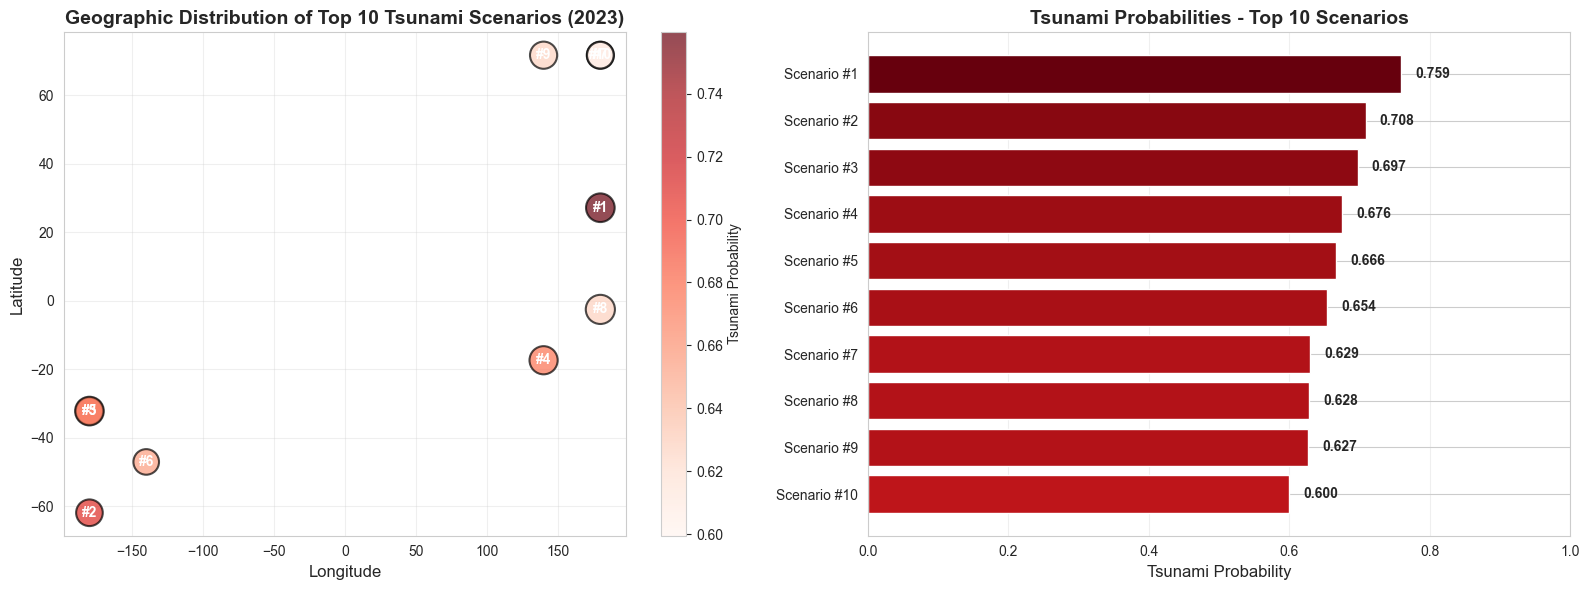

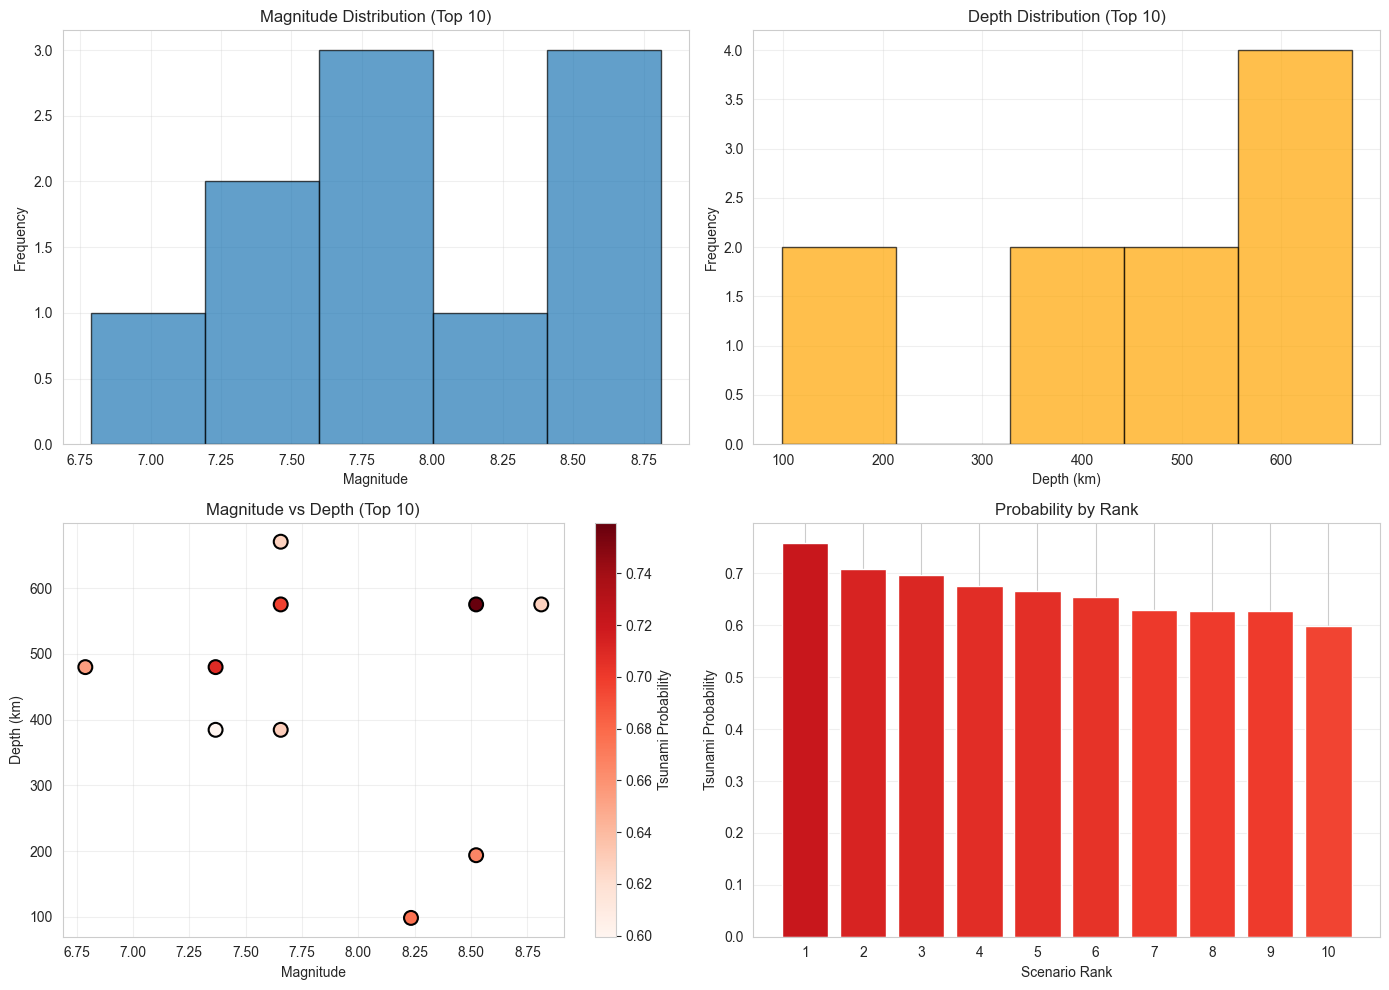

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Geographic distribution
ax1 = axes[0]
scatter = ax1.scatter(top_10_scenarios['longitude'], top_10_scenarios['latitude'], 
                     c=top_10_scenarios['tsunami_probability'], 
                     s=top_10_scenarios['magnitude']*50, 
                     cmap='Reds', alpha=0.7, edgecolors='black', linewidth=1.5)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)
ax1.set_title('Geographic Distribution of Top 10 Tsunami Scenarios (2023)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='Tsunami Probability')

for idx, (i, row) in enumerate(top_10_scenarios.iterrows(), 1):
    ax1.annotate(f'#{idx}', 
                (row['longitude'], row['latitude']),
                fontsize=10, fontweight='bold',
                ha='center', va='center',
                color='white' if row['tsunami_probability'] > 0.5 else 'black')

# Plot 2: Probability bar chart
ax2 = axes[1]
colors = plt.cm.Reds(top_10_scenarios['tsunami_probability'].values / top_10_scenarios['tsunami_probability'].max())
bars = ax2.barh(range(10, 0, -1), top_10_scenarios['tsunami_probability'].values, color=colors)
ax2.set_yticks(range(10, 0, -1))
ax2.set_yticklabels([f"Scenario #{i}" for i in range(1, 11)])
ax2.set_xlabel('Tsunami Probability', fontsize=12)
ax2.set_title('Tsunami Probabilities - Top 10 Scenarios', fontsize=14, fontweight='bold')
ax2.set_xlim(0, 1)
ax2.grid(True, alpha=0.3, axis='x')

for i, (idx, row) in enumerate(top_10_scenarios.iterrows()):
    ax2.text(row['tsunami_probability'] + 0.02, 10-i, 
            f"{row['tsunami_probability']:.3f}",
            va='center', fontweight='bold')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Magnitude distribution
axes[0, 0].hist(top_10_scenarios['magnitude'], bins=5, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Magnitude')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Magnitude Distribution (Top 10)')
axes[0, 0].grid(True, alpha=0.3)

# Depth distribution
axes[0, 1].hist(top_10_scenarios['depth'], bins=5, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_xlabel('Depth (km)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Depth Distribution (Top 10)')
axes[0, 1].grid(True, alpha=0.3)

# Magnitude vs Depth scatter
scatter2 = axes[1, 0].scatter(top_10_scenarios['magnitude'], top_10_scenarios['depth'],
                              c=top_10_scenarios['tsunami_probability'],
                              s=100, cmap='Reds', edgecolors='black', linewidth=1.5)
axes[1, 0].set_xlabel('Magnitude')
axes[1, 0].set_ylabel('Depth (km)')
axes[1, 0].set_title('Magnitude vs Depth (Top 10)')
axes[1, 0].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1, 0], label='Tsunami Probability')

# Probability distribution
axes[1, 1].bar(range(1, 11), top_10_scenarios['tsunami_probability'].values, 
               color=plt.cm.Reds(top_10_scenarios['tsunami_probability'].values))
axes[1, 1].set_xlabel('Scenario Rank')
axes[1, 1].set_ylabel('Tsunami Probability')
axes[1, 1].set_title('Probability by Rank')
axes[1, 1].set_xticks(range(1, 11))
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## Save Predictions

We save the top 10 scenarios and all predictions to a CSV file for further analysis and reference. This made it for easy sharing of results and integration with other systems or reports.


In [ ]:
current_dir = Path().resolve()
if current_dir.name == "Codes (.ipynb & .py)":
    project_root = current_dir.parent
elif (current_dir / "requirements.txt").exists():
    project_root = current_dir
else:
    project_root = current_dir.parent

output_dir = project_root / "outputs"
output_dir.mkdir(exist_ok=True)

all_predictions_path = output_dir / "predictions_2023_all.csv"
scenarios_df.to_csv(all_predictions_path, index=False)
print(f"All {len(scenarios_df)} scenarios saved to: {all_predictions_path}")

top_10_path = output_dir / "predictions_2023_top10.csv"
top_10_scenarios.to_csv(top_10_path, index=False)
print(f"Top 10 scenarios saved to: {top_10_path}")

print(f"\n{'='*100}")
print("Predictive analysis complete!")
print(f"{'='*100}")
print(f"\nKey findings:")
print(f"  - Analyzed {len(scenarios_df)} potential earthquake scenarios for 2023")
print(f"  - Identified {tsunami_predictions.sum()} scenarios with tsunami risk")
print(f"  - Top 10 scenarios have probabilities ranging from {top_10_scenarios['tsunami_probability'].min():.4f} to {top_10_scenarios['tsunami_probability'].max():.4f}")
print(f"  - Average probability of top 10: {top_10_scenarios['tsunami_probability'].mean():.4f} ({top_10_scenarios['tsunami_probability'].mean()*100:.2f}%)")
print(f"\nFiles saved:")
print(f"  - {all_predictions_path}")
print(f"  - {top_10_path}")

All 100 scenarios saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/predictions_2023_all.csv
Top 10 scenarios saved to: /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/predictions_2023_top10.csv

Predictive analysis complete!

Key findings:
  - Analyzed 100 potential earthquake scenarios for 2023
  - Identified 20 scenarios with tsunami risk
  - Top 10 scenarios have probabilities ranging from 0.5995 to 0.7595
  - Average probability of top 10: 0.6645 (66.45%)

Files saved:
  - /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/predictions_2023_all.csv
  - /Users/fefe/Desktop/Cours M1 Albert/Semestre 1/ML supervisé/Projet/ML_II_repo/outputs/predictions_2023_top10.csv
